In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
import seaborn as sns
import numpy as np
from scipy import stats
from IPython.display import display
import pyarrow.parquet as pq
from sklearn.preprocessing import LabelEncoder

In [3]:
# read csv file as parquet file 
na_vals = ['NA', 'Missing','None']
df = pd.read_parquet('Accidents_UK.parquet' ,engine='pyarrow')
# convert the parquet file to pandas dataframe
df_accident = pd.DataFrame(df)
# replace the values that are in the na_vals list with NaN
df_accident.replace(na_vals, np.nan, inplace=True)
# make the accident_index as the index of the dataframe
df_accident.set_index('accident_index', inplace=True)

## EDA

                                     In the following lines we will observe the loaded dataset characteristic

In [4]:
pd.options.display.max_columns = None
df_accident.head()

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1999010SU0945,1999,010SU0945,519490.0,203300.0,-0.271752,51.715661,Metropolitan Police,Slight,1,1,1999-12-25,Saturday,09:30,Hertsmere,Hertsmere,Hertfordshire,Motorway,25.0,Dual carriageway,70.0,Slip road,Give way or uncontrolled,Motorway,25.0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine + high winds,Dry,NaN,NaN,Rural,Yes,Trunk (Roads managed by Highways England),E01023583
1999010SU0946,1999,010SU0946,521740.0,201070.0,-0.239977,51.695136,Metropolitan Police,Slight,2,1,1999-12-17,Friday,18:38,Hertsmere,Hertsmere,Hertfordshire,Motorway,25.0,Dual carriageway,70.0,Not at junction or within 20 metres,Data missing or out of range,-1,None,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - no lighting,Fine + high winds,Dry,NaN,NaN,Rural,Yes,Trunk (Roads managed by Highways England),E01023584
1999010SU0947,1999,010SU0947,519610.0,203240.0,-0.270037,51.715096,Metropolitan Police,Slight,2,2,1999-12-15,Wednesday,18:04,Hertsmere,Hertsmere,Hertfordshire,Motorway,25.0,Dual carriageway,70.0,Not at junction or within 20 metres,Data missing or out of range,-1,None,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,NaN,NaN,Rural,Yes,Trunk (Roads managed by Highways England),E01023583
1999010SU0948,1999,010SU0948,520090.0,202830.0,-0.263233,51.711309,Metropolitan Police,Serious,2,1,1999-12-02,Thursday,04:10,Hertsmere,Hertsmere,Hertfordshire,Motorway,25.0,Dual carriageway,70.0,Not at junction or within 20 metres,Data missing or out of range,-1,None,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - no lighting,Fine no high winds,Dry,NaN,NaN,Rural,Yes,Trunk (Roads managed by Highways England),E01023583
1999010SU0949,1999,010SU0949,522640.0,200320.0,-0.227225,51.688200,Metropolitan Police,Slight,4,3,1999-12-04,Saturday,09:51,Hertsmere,Hertsmere,Hertfordshire,A(M),1.0,One way street/Slip road,70.0,Not at junction or within 20 metres,Data missing or out of range,-1,None,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,NaN,NaN,Rural,Yes,Trunk (Roads managed by Highways England),E01023584


In [5]:
#create method to plot the missing values in the dataset 
def plot_missing_values(df):
    #plot the missing values in the dataset
    df.isnull().sum().plot(kind='bar',figsize=(15,10))
    plt.title('Missing Values in Dataset')
    plt.xlabel('Columns')
    plt.ylabel('Missing Values')
    plt.show()  

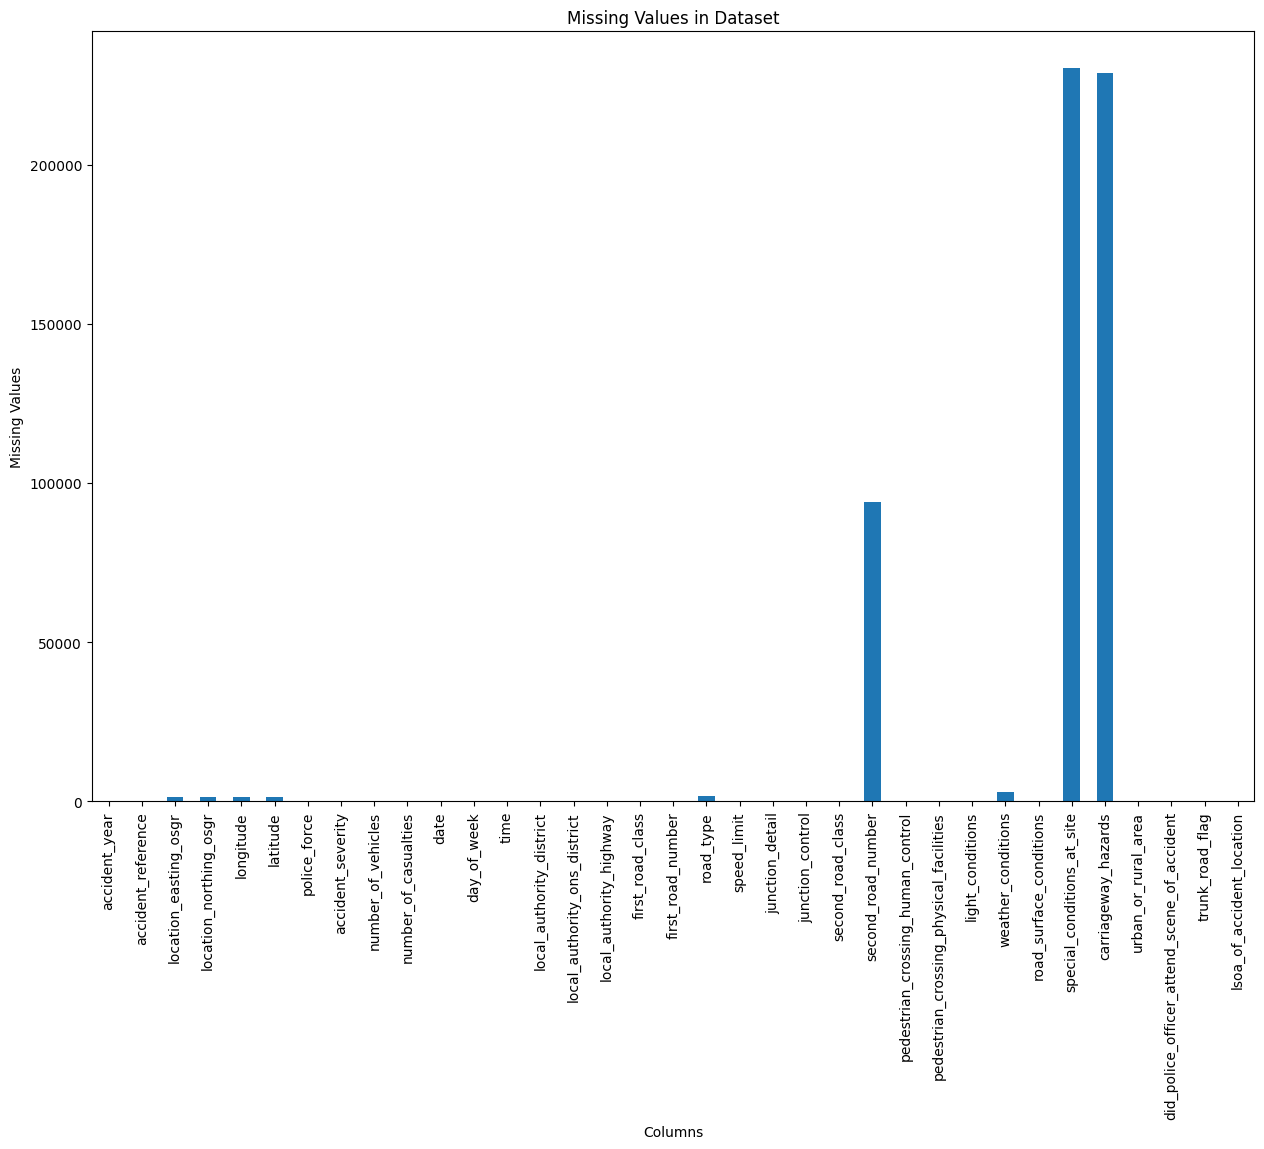

In [6]:
plot_missing_values(df_accident)

In [7]:
df_accident.describe()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,speed_limit
count,235048.0,233680.000000,2.336800e+05,233680.000000,233680.000000,235048.000000,235048.000000,235048.000000
mean,1999.0,439201.304305,2.982800e+05,-1.443759,52.572726,1.831507,1.362743,39.419523
std,0.0,94058.260314,1.577800e+05,1.383585,1.420653,0.722367,0.847464,14.279194
min,1999.0,65200.000000,1.050000e+04,-7.513285,49.914287,1.000000,1.000000,20.000000
25%,1999.0,375920.000000,1.790000e+05,-2.361050,51.497090,1.000000,1.000000,30.000000
50%,1999.0,438420.000000,2.661300e+05,-1.426203,52.287484,2.000000,1.000000,30.000000
75%,1999.0,523320.000000,3.962800e+05,-0.218929,53.461725,2.000000,1.000000,60.000000
max,1999.0,655300.000000,1.201600e+06,1.758606,60.693363,24.000000,41.000000,70.000000


In [8]:
df_accident.columns

Index(['accident_year', 'accident_reference', 'location_easting_osgr',
       'location_northing_osgr', 'longitude', 'latitude', 'police_force',
       'accident_severity', 'number_of_vehicles', 'number_of_casualties',
       'date', 'day_of_week', 'time', 'local_authority_district',
       'local_authority_ons_district', 'local_authority_highway',
       'first_road_class', 'first_road_number', 'road_type', 'speed_limit',
       'junction_detail', 'junction_control', 'second_road_class',
       'second_road_number', 'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location'],
      dtype='object')

In [9]:
df_accident.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235048 entries, 1999010SU0945 to 1999984052899
Data columns (total 35 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_year                                235048 non-null  int32  
 1   accident_reference                           235048 non-null  object 
 2   location_easting_osgr                        233680 non-null  float64
 3   location_northing_osgr                       233680 non-null  float64
 4   longitude                                    233680 non-null  float64
 5   latitude                                     233680 non-null  float64
 6   police_force                                 235048 non-null  object 
 7   accident_severity                            235048 non-null  object 
 8   number_of_vehicles                           235048 non-null  int32  
 9   number_of_casualties                         

## Detecting Missing Values

In [10]:
# Calculating sum of null entries and percentage of null entries
sum_null = df_accident.isnull().sum()
perc_null = df_accident.isnull().sum() / len(df_accident)
perc_null_mean = df_accident.isnull().mean()*100
sum_null,perc_null,perc_null_mean

(accident_year                                       0
 accident_reference                                  0
 location_easting_osgr                            1368
 location_northing_osgr                           1368
 longitude                                        1368
 latitude                                         1368
 police_force                                        0
 accident_severity                                   0
 number_of_vehicles                                  0
 number_of_casualties                                0
 date                                                0
 day_of_week                                         0
 time                                                0
 local_authority_district                            0
 local_authority_ons_district                        0
 local_authority_highway                             0
 first_road_class                                    0
 first_road_number                                  27
 road_type

In this dataset we observe that there are missing values in ten columns which are **location_easting_osgr**, **location_northing_osgr**, **longitude**, **latitude**, **first_road_number**, **road_type**, **second_road_number** , **weather_conditions** ,**special_conditions_at_site** and **carriageway_hazards**. As we can observe that the first four columns have the same value of missing values as they define the specification of the location of the accident on the Grid system so may be there are relation between these missing values in these columns and the **urban_or_rural_area** column as it identify the location of the accident if it was in urban or rural area. 

In [11]:
#get 
print(df_accident.location_easting_osgr.isnull().groupby(df_accident['urban_or_rural_area']).mean() ,
df_accident.location_northing_osgr.isnull().groupby(df_accident['urban_or_rural_area']).mean(),
df_accident.longitude.isnull().groupby(df_accident['urban_or_rural_area']).mean(),
df_accident.latitude.isnull().groupby(df_accident['urban_or_rural_area']).mean())


urban_or_rural_area
Rural          0.000263
Unallocated    0.855781
Urban          0.000000
Name: location_easting_osgr, dtype: float64 urban_or_rural_area
Rural          0.000263
Unallocated    0.855781
Urban          0.000000
Name: location_northing_osgr, dtype: float64 urban_or_rural_area
Rural          0.000263
Unallocated    0.855781
Urban          0.000000
Name: longitude, dtype: float64 urban_or_rural_area
Rural          0.000263
Unallocated    0.855781
Urban          0.000000
Name: latitude, dtype: float64


Here we can observe that that the four columns have high probability for the missing data when the area where the accident happened is **Unallocated** so we can say that the missing valuse in the columns are not missing at random **MNAR**

when dealing with **road_type** column and  **first_road_number**  we can see that the missing data are random **MCAR** also the missing data in the **first_road_number** is very small so we can simply drop its recods on the on the other hand we can use the Frequent category imputation technique in the **road_type** column as the difference between the most frequent category and the second frequent category is very big such that it will not affect the covariance of the whole data also the number of missing data small.

In [12]:
df_accident.road_type.isnull().groupby(df_accident['first_road_class']).mean(),df_accident.first_road_number.isnull().groupby(df_accident['first_road_class']).mean()

(first_road_class
 A               0.005080
 A(M)            0.005128
 B               0.004729
 C               0.005363
 Motorway        0.005391
 Unclassified    0.011747
 Name: road_type, dtype: float64,
 first_road_class
 A               0.000074
 A(M)            0.001709
 B               0.000380
 C               0.000000
 Motorway        0.000820
 Unclassified    0.000000
 Name: first_road_number, dtype: float64)

In [13]:
#here we get the most frequent road type in each category of the road class 
df = df_accident.groupby(df_accident['first_road_class'])['road_type'].apply(lambda x: x.value_counts().index[0]).reset_index()
dict(zip(df.first_road_class, df.road_type))

{'A': 'Single carriageway',
 'A(M)': 'Dual carriageway',
 'B': 'Single carriageway',
 'C': 'Single carriageway',
 'Motorway': 'Dual carriageway',
 'Unclassified': 'Single carriageway'}

when dealing with the **second_road_number** column we can observe that the most missing values in this column are related to the **-1** class which mean that this accident did not happen at an intersection between 2 different roads/street so we can we deal with it as **NMAR** data 

In [14]:
df_accident.second_road_number.isnull().groupby(df_accident['second_road_class']).mean()

second_road_class
-1              1.000000
A               0.000277
A(M)            0.000000
B               0.001781
C               0.000000
Motorway        0.000000
Unclassified    0.000000
Name: second_road_number, dtype: float64

**as may be a relation between the weather conditions and the road surface conditions as if the weather is rainy the road will be Wet** so as we can see below that most of data that was lost is categorized under the **Data missing or out of range** category so is data is **not missing at random** and what we can do is to impute these missing data with **"Missing"** value to indicate that data is missing 

In [15]:
df_accident.weather_conditions.isnull().groupby(df_accident['road_surface_conditions']).mean()

road_surface_conditions
Data missing or out of range    0.572549
Dry                             0.014099
Flood over 3cm. deep            0.010101
Frost or ice                    0.008156
Mud                             0.024291
Oil or diesel                   0.018692
Snow                            0.006842
Wet or damp                     0.009935
Name: weather_conditions, dtype: float64

coming to the last two column **special_conditions_at_site** and **carriageway_hazards**. These two columns having a lot of data that is lost so we can drop both of them.

In [16]:
df_accident.special_conditions_at_site.isnull().mean(),df_accident.carriageway_hazards.isnull().mean()

(0.9798253973656444, 0.9727034478064055)

# Observe duplicate data

here as we see there is no duplication is the dataset as the two must unique columns **accident_reference** and **accident_index** have no duplicates or we can make it more general and use **duplicated()** on the dataframe directly

In [17]:
df_accident.accident_reference.duplicated().sum(),df_accident.index.duplicated().sum()

(0, 0)

In [18]:
df_accident.duplicated().sum()

0

## Handling Missing data

In [19]:
#to show the distribution for any column
def one_distribution(df, column_value,plot_value):
    exec('sns.'+ plot_value + '(df[column_value])')
    plt.title('Dist. of ' + column_value)
    plt.show()

def two_distribution(df1,df2,column_value):
    
    # plot the curve before imputation
    sns.kdeplot(df1[column_value], color='r' , fill = True )
    # plot the curve after imputation
    sns.kdeplot(df2[column_value], color='b' , fill = True)
    # add legend
    plt.show() 
       
def end_of_tail_imputation(df , target):
    temp = df.copy()
    dev_target = df[target].mean() + 3 * df[target].std()
    temp[target] = temp[target].fillna(dev_target)
    return temp

def mapped_most_frequent_imputation(df , target , mapped):
    temp = df.copy()
    df_1 = temp.groupby(temp[mapped])[target].apply(lambda x: x.value_counts().index[0]).reset_index()
    map_dict = dict(zip(df_1[mapped], df_1[target]))
    temp[target] = temp[target].fillna(temp[mapped].map(map_dict))
    return temp
    
def missing_indicator_imputation(df , target ):
    temp = df.copy()
    Missing_indicator = temp[target].isnull().astype(int)    
    column_index = temp.columns.get_loc(target)+1
    temp.insert(loc= column_index , column= 'Missing_Indicator' ,value=Missing_indicator)
    temp[target] = temp[target].fillna(temp[target].mean())
    return temp
 
def arbitrary_value_imputation(df , target , value):
    temp = df.copy()
    temp[target] = temp[target].fillna(value)
    return temp   
    
    
def replace_values_in_column(df , target , value , new_value):
    temp = df.copy()
    temp[target] = temp[target].replace(value, new_value)
    return temp


     

we will impute the **location_easting_osgr**, **location_northing_osgr**, **longitude** and **latitude** with **End of tail imputation** as the missing data at these columns are not missing at random

at  the following cell we will print out the difference between before and after imputation on the four columns the **red graph** is for before imputing **blue graph** is after imputing

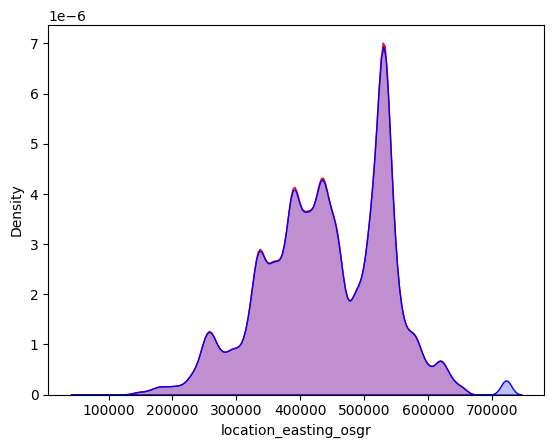

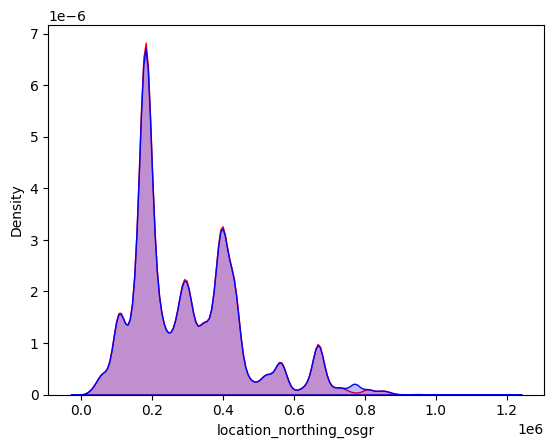

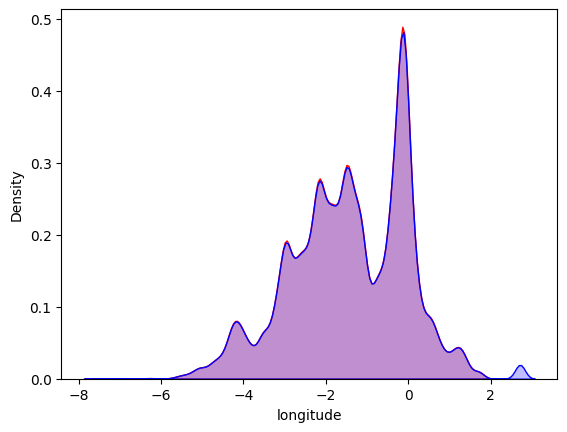

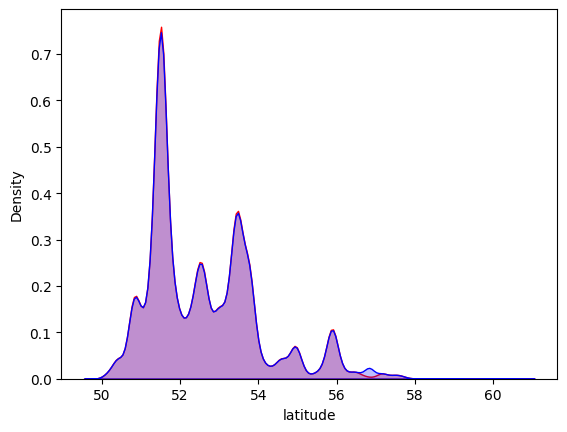

In [20]:
df_accident_imputed1 = end_of_tail_imputation(df_accident,'location_easting_osgr')
df_accident_imputed2 = end_of_tail_imputation(df_accident_imputed1,'location_northing_osgr')
df_accident_imputed3 = end_of_tail_imputation(df_accident_imputed2,'longitude')
df_accident_imputed4 = end_of_tail_imputation(df_accident_imputed3,'latitude')
columns = ['location_easting_osgr','location_northing_osgr','longitude','latitude']
for column in columns:
    two_distribution(df_accident,df_accident_imputed4,column)
    


In [21]:
df_accident_imputed4.isnull().sum()

accident_year                                       0
accident_reference                                  0
location_easting_osgr                               0
location_northing_osgr                              0
longitude                                           0
latitude                                            0
police_force                                        0
accident_severity                                   0
number_of_vehicles                                  0
number_of_casualties                                0
date                                                0
day_of_week                                         0
time                                                0
local_authority_district                            0
local_authority_ons_district                        0
local_authority_highway                             0
first_road_class                                    0
first_road_number                                  27
road_type                   

as we can see below we droped all the records that have null values in the **first_road_number** column as it has small number of records that have null value but we need also to conver this column to float all it has is number excepting for one unique value which is string as this will help us detecting outliers in this column

In [23]:
# we have string value among the float values in the column so what we need to do is to convert this value into float
print(df_accident_imputed4.first_road_number.unique().tolist())

['25.0', '1.0', '1081.0', '4008.0', '10.0', '315.0', '302.0', '3214.0', '202.0', '3217.0', 'first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero ', '323.0', '3212.0', '324.0', '310.0', '4.0', '312.0', '326.0', '3213.0', '319.0', '3216.0', '3036.0', '313.0', '450.0', '412.0', '40.0', '4206.0', '3220.0', '415.0', '4204.0', '404.0', '308.0', '3218.0', '304.0', '325.0', '314.0', '41.0', '316.0', '4207.0', '400.0', '401.0', '4202.0', '4201.0', '406.0', '2327.0', '3211.0', '201.0', '3.0', '11.0', '501.0', '1211.0', '100.0', '132.0', '300.0', '1202.0', '500.0', '1210.0', '4208.0', '301.0', '4200.0', '402.0', '506.0', '5205.0', '507.0', '5204.0', '5.0', '525.0', '524.0', '523.0', '4205.0', '4209.0', '413.0', '414.0', '411.0', '3215.0', '410.0', '511.0', '509.0', '519.0', '510.0', '502.0', '520.0', '517.0', '518.0', '503.0', '5200.0', '5202.0', '512.0', '513.0', '504.0', '521.0', '5201.0', '5203.0', '317.0', '219.0', '217.0', '318.0', '3219.0', '30

In [24]:
df_accident_imputed4 = replace_values_in_column(df_accident_imputed4,'first_road_number','first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero ',0.0)
df_accident_imputed4["first_road_number"] = df_accident_imputed4["first_road_number"].astype(float)
df_accident_imputed4.first_road_number.dtypes

dtype('float64')

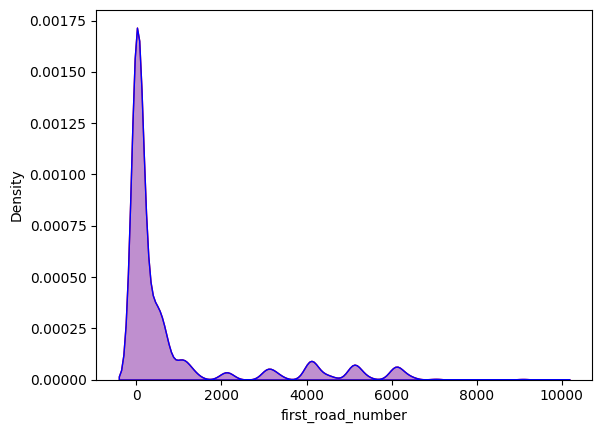

In [25]:
#after converting this column to float will drop all nan values in it 
df_accident_imputed_5 = df_accident_imputed4.dropna(axis='index', subset=['first_road_number'])
two_distribution(df_accident_imputed4,df_accident_imputed_5,'first_road_number')

In [26]:
df_accident_imputed_6 = mapped_most_frequent_imputation(df_accident_imputed_5,'road_type','first_road_class')

In [27]:
df_accident_imputed_6.isnull().sum()

accident_year                                       0
accident_reference                                  0
location_easting_osgr                               0
location_northing_osgr                              0
longitude                                           0
latitude                                            0
police_force                                        0
accident_severity                                   0
number_of_vehicles                                  0
number_of_casualties                                0
date                                                0
day_of_week                                         0
time                                                0
local_authority_district                            0
local_authority_ons_district                        0
local_authority_highway                             0
first_road_class                                    0
first_road_number                                   0
road_type                   

also in the **second_road_number** column we need to convert it from string to float before imputing it but it have string value that make an error as what happend in **first_road_number** column

In [29]:
print(df_accident_imputed_6["second_road_number"].unique().tolist())

['25.0', None, '1081.0', 'first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero ', '1.0', '10.0', '127.0', '12.0', '326.0', '3215.0', '3212.0', '324.0', '3214.0', '310.0', '323.0', '202.0', '302.0', '3213.0', '4.0', '3217.0', '3216.0', '3203.0', '315.0', '319.0', '4206.0', '40.0', '4204.0', '412.0', '450.0', '3220.0', '415.0', '3218.0', '316.0', '325.0', '304.0', '308.0', '314.0', '3031.0', '401.0', '4202.0', '2327.0', '400.0', '406.0', '4201.0', '300.0', '3211.0', '1211.0', '501.0', '4208.0', '201.0', '100.0', '500.0', '5200.0', '521.0', '134.0', '402.0', '301.0', '4200.0', '404.0', '506.0', '507.0', '41.0', '5.0', '5205.0', '525.0', '524.0', '5204.0', '413.0', '312.0', '411.0', '4209.0', '4205.0', '4207.0', '410.0', '414.0', '518.0', '511.0', '509.0', '502.0', '520.0', '510.0', '512.0', '503.0', '5202.0', '517.0', '522.0', '519.0', '504.0', '5201.0', '317.0', '217.0', '318.0', '219.0', '409.0', '306.0', '4020.0', '3219.0', '408.0', '1202.

In [30]:
df_accident_imputed_6 = replace_values_in_column(df_accident_imputed_6,'second_road_number','first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero ',0.0)
df_accident_imputed_6["second_road_number"] = df_accident_imputed_6["second_road_number"].astype(float)
df_accident_imputed_6.second_road_number.dtypes

dtype('float64')

In [31]:
df_accident_imputed_7 = missing_indicator_imputation(df_accident_imputed_6,'second_road_number')

In [32]:
pd.options.display.max_columns = None
df_accident_imputed_7.head()

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,Missing_Indicator,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1999010SU0945,1999,010SU0945,519490.0,203300.0,-0.271752,51.715661,Metropolitan Police,Slight,1,1,1999-12-25,Saturday,09:30,Hertsmere,Hertsmere,Hertfordshire,Motorway,25.0,Dual carriageway,70.0,Slip road,Give way or uncontrolled,Motorway,25.000000,0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine + high winds,Dry,NaN,NaN,Rural,Yes,Trunk (Roads managed by Highways England),E01023583
1999010SU0946,1999,010SU0946,521740.0,201070.0,-0.239977,51.695136,Metropolitan Police,Slight,2,1,1999-12-17,Friday,18:38,Hertsmere,Hertsmere,Hertfordshire,Motorway,25.0,Dual carriageway,70.0,Not at junction or within 20 metres,Data missing or out of range,-1,372.343913,1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - no lighting,Fine + high winds,Dry,NaN,NaN,Rural,Yes,Trunk (Roads managed by Highways England),E01023584
1999010SU0947,1999,010SU0947,519610.0,203240.0,-0.270037,51.715096,Metropolitan Police,Slight,2,2,1999-12-15,Wednesday,18:04,Hertsmere,Hertsmere,Hertfordshire,Motorway,25.0,Dual carriageway,70.0,Not at junction or within 20 metres,Data missing or out of range,-1,372.343913,1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,NaN,NaN,Rural,Yes,Trunk (Roads managed by Highways England),E01023583
1999010SU0948,1999,010SU0948,520090.0,202830.0,-0.263233,51.711309,Metropolitan Police,Serious,2,1,1999-12-02,Thursday,04:10,Hertsmere,Hertsmere,Hertfordshire,Motorway,25.0,Dual carriageway,70.0,Not at junction or within 20 metres,Data missing or out of range,-1,372.343913,1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - no lighting,Fine no high winds,Dry,NaN,NaN,Rural,Yes,Trunk (Roads managed by Highways England),E01023583
1999010SU0949,1999,010SU0949,522640.0,200320.0,-0.227225,51.688200,Metropolitan Police,Slight,4,3,1999-12-04,Saturday,09:51,Hertsmere,Hertsmere,Hertfordshire,A(M),1.0,One way street/Slip road,70.0,Not at junction or within 20 metres,Data missing or out of range,-1,372.343913,1,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,NaN,NaN,Rural,Yes,Trunk (Roads managed by Highways England),E01023584


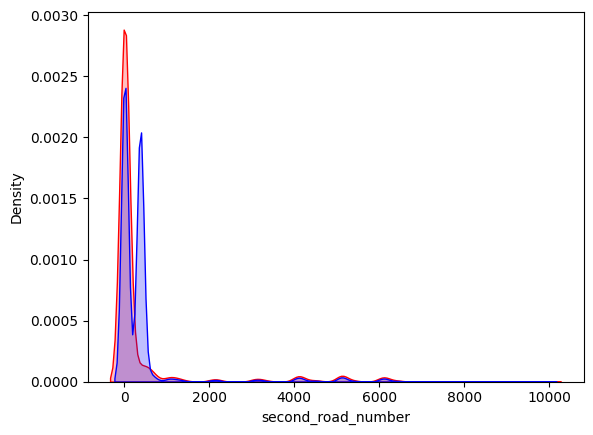

In [33]:
#difference between the distribution of the second_road_number before and after impuation
two_distribution(df_accident_imputed_6,df_accident_imputed_7,'second_road_number')

In [34]:
df_accident_imputed_7.isnull().sum()

accident_year                                       0
accident_reference                                  0
location_easting_osgr                               0
location_northing_osgr                              0
longitude                                           0
latitude                                            0
police_force                                        0
accident_severity                                   0
number_of_vehicles                                  0
number_of_casualties                                0
date                                                0
day_of_week                                         0
time                                                0
local_authority_district                            0
local_authority_ons_district                        0
local_authority_highway                             0
first_road_class                                    0
first_road_number                                   0
road_type                   

as we mentiod above the **weather_conditions** column most of its values is missing because it is categorized under **out of range or not been redored** category so we will impute it using **Arbitrary Value Imputation** technique.

In [35]:
df_accident_imputed_8 = arbitrary_value_imputation(df_accident_imputed_7,'weather_conditions','Missing')


In [36]:
df_accident_imputed_8.isnull().sum()

accident_year                                       0
accident_reference                                  0
location_easting_osgr                               0
location_northing_osgr                              0
longitude                                           0
latitude                                            0
police_force                                        0
accident_severity                                   0
number_of_vehicles                                  0
number_of_casualties                                0
date                                                0
day_of_week                                         0
time                                                0
local_authority_district                            0
local_authority_ons_district                        0
local_authority_highway                             0
first_road_class                                    0
first_road_number                                   0
road_type                   

the **special_conditions_at_site** and **carriageway_hazards** columns both will be droped as almost of the value in both are **None**

In [37]:
df_accident_imputed_9 = df_accident_imputed_8.drop('special_conditions_at_site', axis=1)
df_accident_imputed_10 = df_accident_imputed_9.drop('carriageway_hazards', axis=1)

In [38]:
print("the dimension of the dataframe before droping the two columns is: " , df_accident_imputed_8.shape)

print("the dimension of the dataframe after droping the two columns is: " , df_accident_imputed_10.shape)


the dimension of the dataframe before droping the two columns is:  (235021, 36)
the dimension of the dataframe after droping the two columns is:  (235021, 34)


In [39]:
df_accident_imputed_10.isnull().sum()

accident_year                                  0
accident_reference                             0
location_easting_osgr                          0
location_northing_osgr                         0
longitude                                      0
latitude                                       0
police_force                                   0
accident_severity                              0
number_of_vehicles                             0
number_of_casualties                           0
date                                           0
day_of_week                                    0
time                                           0
local_authority_district                       0
local_authority_ons_district                   0
local_authority_highway                        0
first_road_class                               0
first_road_number                              0
road_type                                      0
speed_limit                                    0
junction_detail     

## Outliers Observing

In [40]:
df_accident_outliers = df_accident_imputed_10.copy()

In [41]:
df_accident_outliers.describe()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,first_road_number,speed_limit,second_road_number,Missing_Indicator
count,235021.0,235021.000000,2.350210e+05,235021.000000,235021.000000,235021.000000,235021.000000,235021.000000,235021.000000,235021.000000,235021.000000
mean,1999.0,440847.757071,3.010470e+05,-1.419542,52.597639,1.831483,1.362738,824.631905,39.418477,372.343913,0.399705
std,0.0,96210.119716,1.613917e+05,1.415241,1.453173,0.722332,0.847482,1642.743145,14.278349,938.952154,0.489839
min,1999.0,65200.000000,1.050000e+04,-7.513285,49.914287,1.000000,1.000000,0.000000,20.000000,0.000000,0.000000
25%,1999.0,376600.000000,1.791400e+05,-2.352048,51.498336,1.000000,1.000000,0.000000,30.000000,0.000000,0.000000
50%,1999.0,439200.000000,2.684700e+05,-1.415391,52.306511,2.000000,1.000000,40.000000,30.000000,121.000000,0.000000
75%,1999.0,523990.000000,3.973500e+05,-0.209534,53.471235,2.000000,1.000000,586.000000,60.000000,372.343913,1.000000
max,1999.0,721376.085248,1.201600e+06,2.706995,60.693363,24.000000,41.000000,9777.000000,70.000000,9943.000000,1.000000


## General Functions Below

In [42]:
#visualize the boxplot and the density functions for a column
def visualize(dataframe , target ):
    plt.boxplot(dataframe[target])
    plt.title("distribution of " + target)
    plt.show()
    sns.kdeplot(dataframe[target])
    plt.show()
    
#Detecting and remove outliers using z-score
def detecting_outliers_zscore(dataframe , target):
    temp = dataframe.copy()
    z_score = np.abs(stats.zscore(temp[target]))
    filtered_entries = z_score < 3
    df_zscore_filter = temp[filtered_entries]
    return df_zscore_filter

#Detecting and remove ouliers using IQR
def detecting_outliers_IQR(dataframe , target):
    temp = dataframe.copy()
    Q1 = temp[target].quantile(0.25)
    Q3 = temp[target].quantile(0.75)
    IQR = Q3 - Q1
    cut_off = IQR * 1.5
    lower = Q1 - cut_off
    upper =  Q3 + cut_off
    df_IQR = temp[(temp[target] < upper) & (temp[target] > lower)]
    return df_IQR

#Detecting outliers multivariant using scatter plot
def detecting_outliers_multivariant_scatter(dataframe , target_1 , target_2):
    fig, ax = plt.subplots(figsize=(16,8))
    ax.scatter(dataframe[target_1], dataframe[target_2])
    ax.set_xlabel(target_1)
    ax.set_ylabel(target_2)
    plt.show()

#Detecting outliers multivariant using Local Outlier Factor plot
def detecting_outliers_multivariant_LOF(dataframe , target_1 , target_2):
    clf = LocalOutlierFactor()
    X = dataframe[[target_1,target_2]].values
    y_pred = clf.fit_predict(X)
    plt.figure(figsize=(12,12))
    in_mask = [True if l == 1 else False for l in y_pred]
    out_mask = [True if l == -1 else False for l in y_pred]
    plt.title("Local Outlier Factor (LOF)")
    a = plt.scatter(X[in_mask, 0], X[in_mask, 1], c = 'blue',
                edgecolor = 'k', s = 30)
    # outliers
    b = plt.scatter(X[out_mask, 0], X[out_mask, 1], c = 'red',
                edgecolor = 'k', s = 30)
    plt.axis('tight')
    plt.xlabel(target_1);
    plt.ylabel(target_2);
    plt.show()

#replace outliers values with Quantile-based flooring and capping
def replacing_outliers_quantile_based(dataframe , target):
    temp = dataframe.copy()
    floor = temp[target].quantile(0.10)
    cap = temp[target].quantile(0.90)
    temp[target] = np.where(temp[target] <floor, floor,temp[target])
    temp[target] = np.where(temp[target] >cap,cap,temp[target])
    return temp

#replace outliers values with Mean\Median values 
def replacing_outliers_with_mean(dataframe , target):
    temp = dataframe.copy()
    median = dataframe[target].median()
    cutoff = dataframe[target].mean() + temp[target].std() * 3
    temp[target] = np.where(temp[target]>cutoff, median,temp[target])
    return temp

#Get the number of outliers in a dataframe    
def get_number_of_outliers(dataframe , target):
    temp = dataframe.copy()
    Q1 = temp[target].quantile(0.25)
    Q3 = temp[target].quantile(0.75)
    IQR = Q3 - Q1
    cut_off = IQR * 1.5
    lower = Q1 - cut_off
    upper =  Q3 + cut_off
    df1 = temp[temp[target]> upper]
    df2 = temp[temp[target] < lower]
    no_ouliers =  df1.shape[0]+ df2.shape[0]
    return no_ouliers
    
        

first we will observe the outliers at the these four column as they are related to each other (**location_easting_osgr**,**longitude**) and (**location_northing_osgr**,**latitude**)

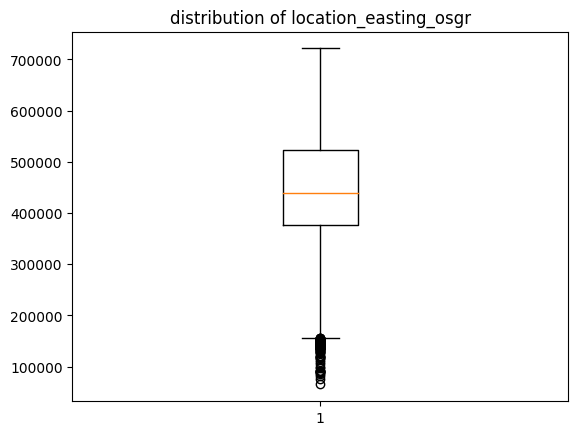

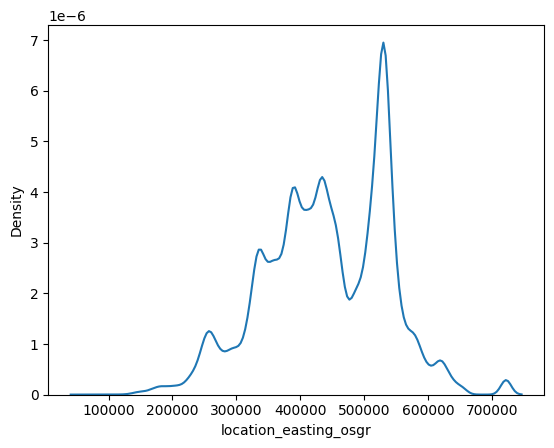

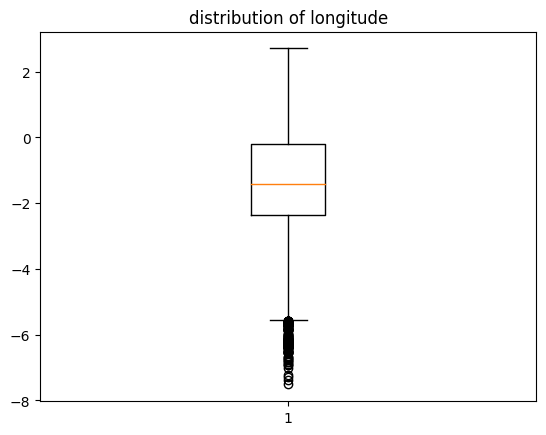

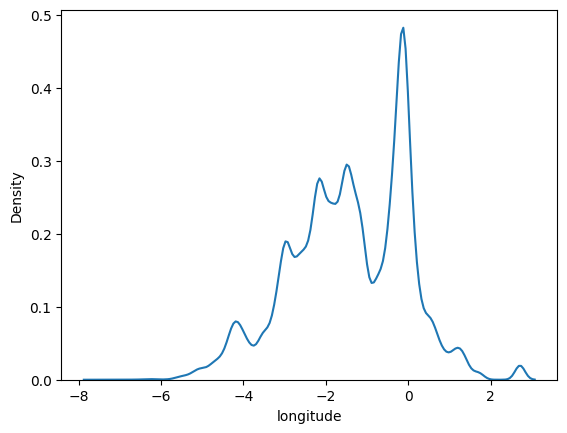

In [43]:
#As we can observe below that the two columns have negative skew
visualize(df_accident_outliers , 'location_easting_osgr')
visualize(df_accident_outliers , 'longitude')

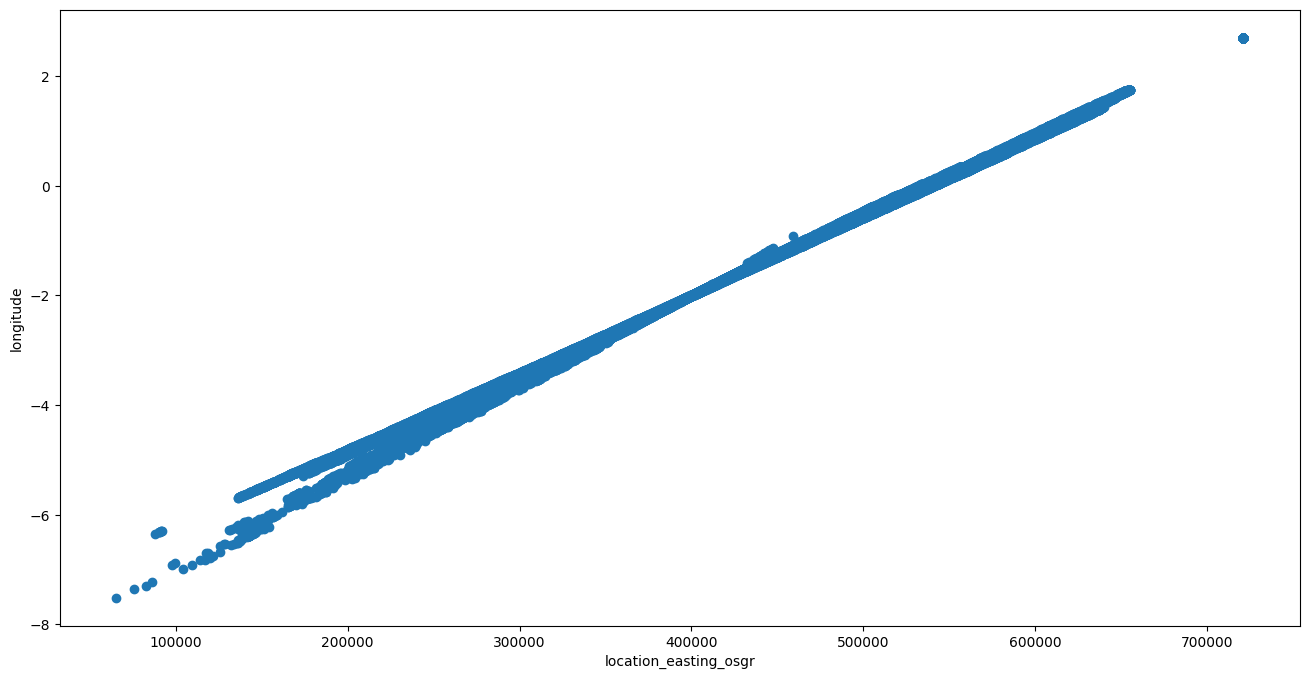

In [44]:
detecting_outliers_multivariant_scatter(df_accident_outliers , 'location_easting_osgr' ,'longitude')

In [45]:
no_1 = get_number_of_outliers(df_accident_outliers , 'location_easting_osgr') 
no_2 = get_number_of_outliers(df_accident_outliers , 'longitude')
print("the number of outliers in location_easting_osgr column is: " , no_1)
print("the number of outliers in longitude column is: " , no_2)

the number of outliers in location_easting_osgr column is:  293
the number of outliers in longitude column is:  210


observing outliers in (**location_northing_osgr**,**latitude**)

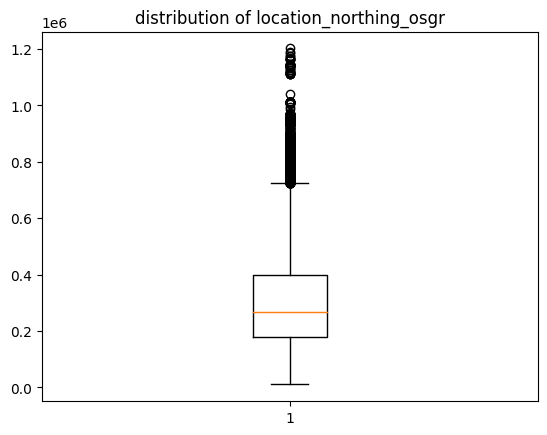

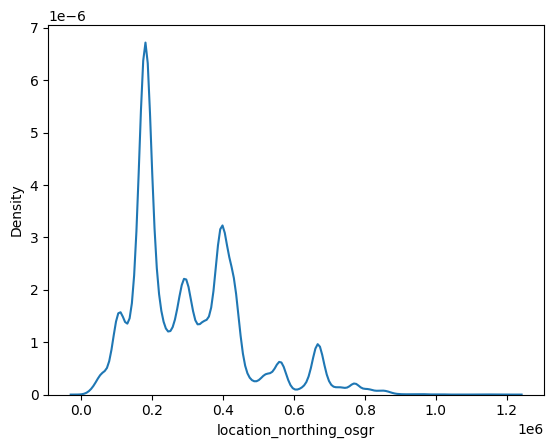

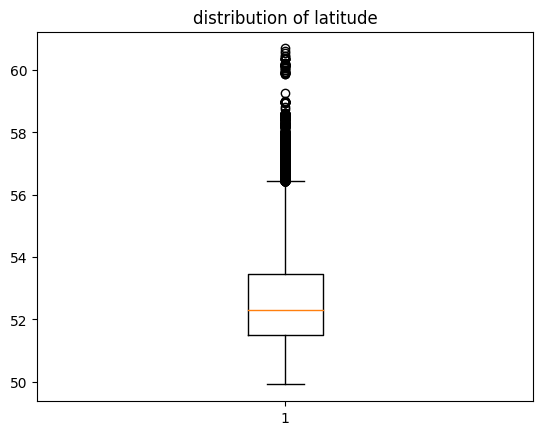

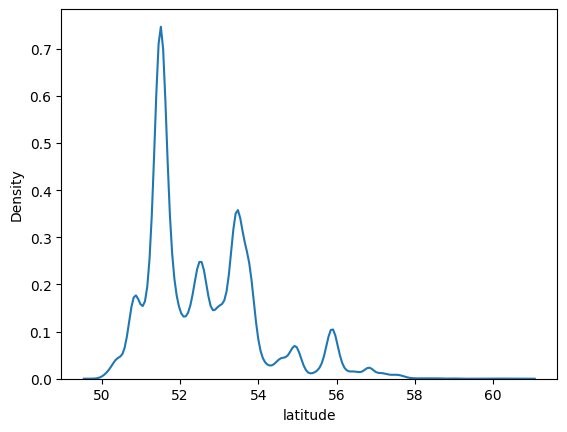

In [46]:
#As we can observe below that the two columns have positive skew
visualize(df_accident_outliers , 'location_northing_osgr')
visualize(df_accident_outliers , 'latitude')

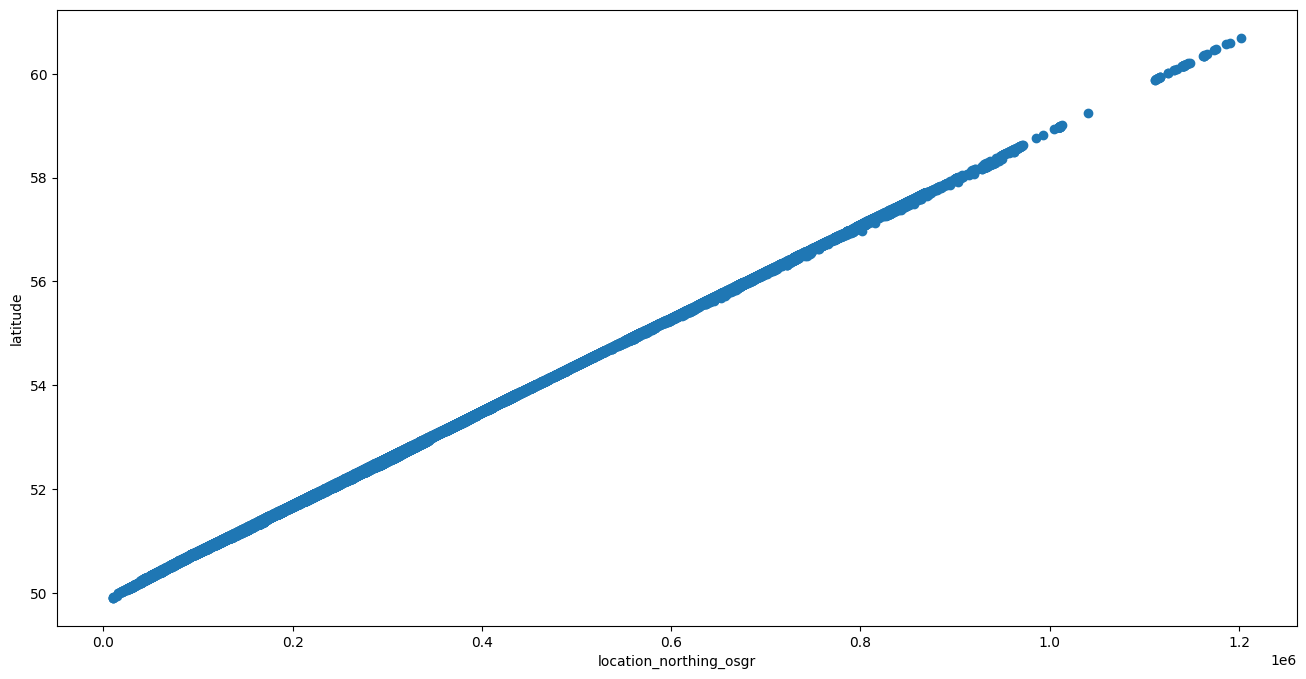

In [47]:
detecting_outliers_multivariant_scatter(df_accident_outliers , 'location_northing_osgr' ,'latitude')

In [48]:
no_1 = get_number_of_outliers(df_accident_outliers , 'location_northing_osgr') 
no_2 = get_number_of_outliers(df_accident_outliers , 'latitude')
print("the number of outliers in location_northing_osgr column is: " , no_1)
print("the number of outliers in latitude column is: " , no_2)

the number of outliers in location_northing_osgr column is:  4508
the number of outliers in latitude column is:  4421


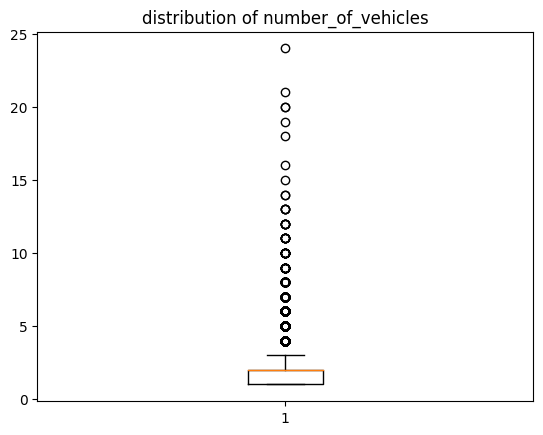

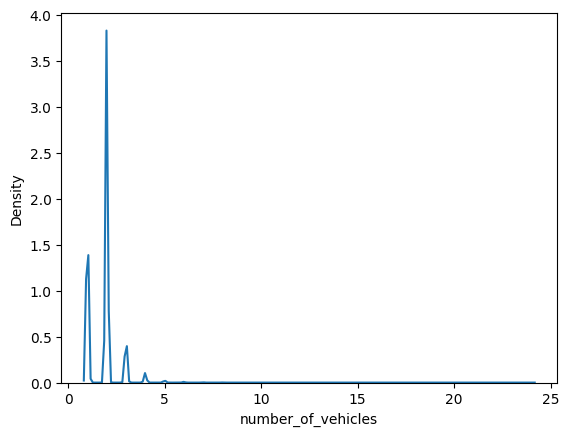

In [49]:
#detecting outliers in number_of_vehicles column
#the number_of_vehicles column is positive skew
visualize(df_accident_outliers , 'number_of_vehicles')

In [50]:
no_1 = get_number_of_outliers(df_accident_outliers , 'number_of_vehicles')
print("the number of outliers in the number_of_vehicles column is: " , no_1)

the number of outliers in the number_of_vehicles column is:  5166


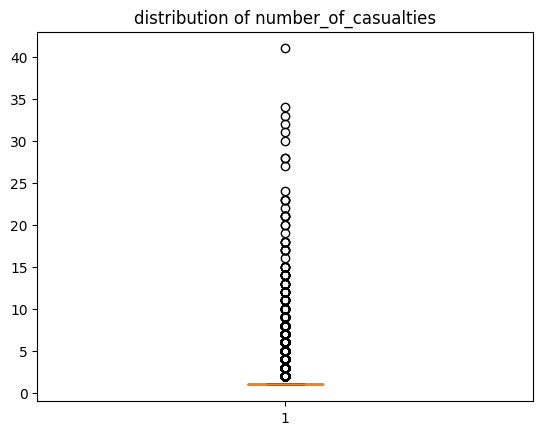

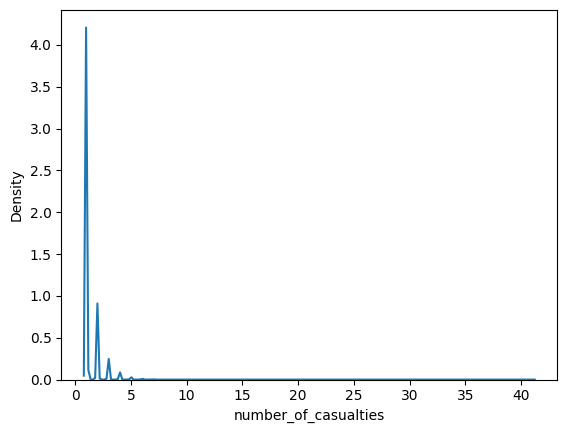

In [51]:
#detecting outliers in the number_of_casaulties column
#the number_of_casaulties column is positive skew
visualize(df_accident_outliers , 'number_of_casualties')

In [52]:
no_1 = get_number_of_outliers(df_accident_outliers , 'number_of_casualties')
print("the number of outliers in the number_of_casualties column is: " , no_1)

the number of outliers in the number_of_casualties column is:  55827


with the huge number of outliers in 

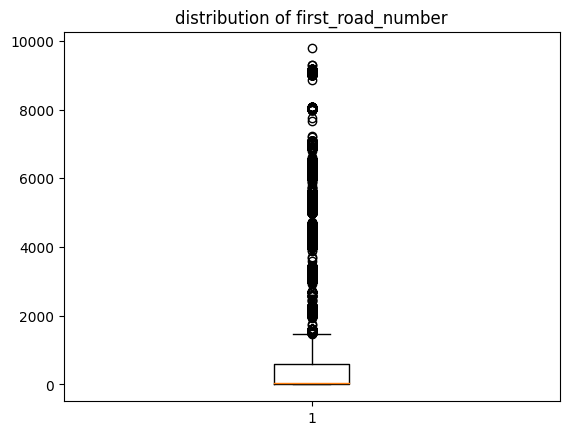

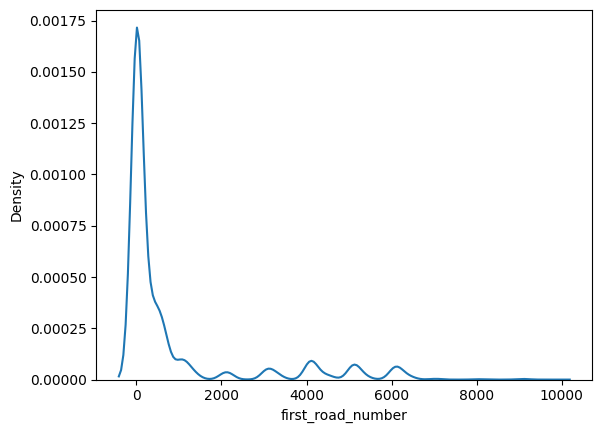

In [53]:
#detecting outliers in the first_road_number column
#the first_road_number column is positive skew
visualize(df_accident_outliers , 'first_road_number')

In [54]:
no_1 = get_number_of_outliers(df_accident_outliers , 'first_road_number')
print("the number of outliers in the first_road_number column is: " , no_1)

the number of outliers in the first_road_number column is:  35022


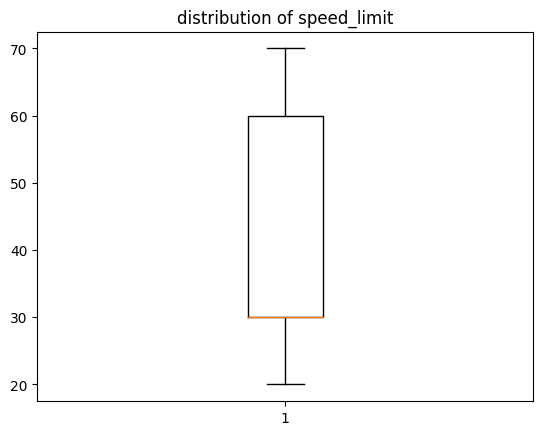

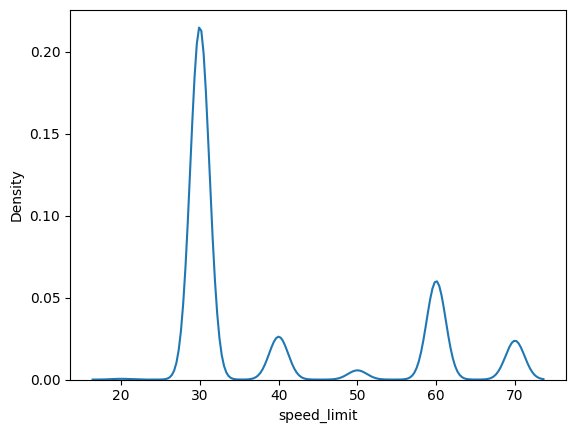

In [55]:
#detecting outliers in the speed_limit column
#the speed_limit column has no outliers
visualize(df_accident_outliers , 'speed_limit')

In [56]:
no_1 = get_number_of_outliers(df_accident_outliers , 'speed_limit')
print("the number of outliers in the speed_limit column is: " , no_1)

the number of outliers in the speed_limit column is:  0


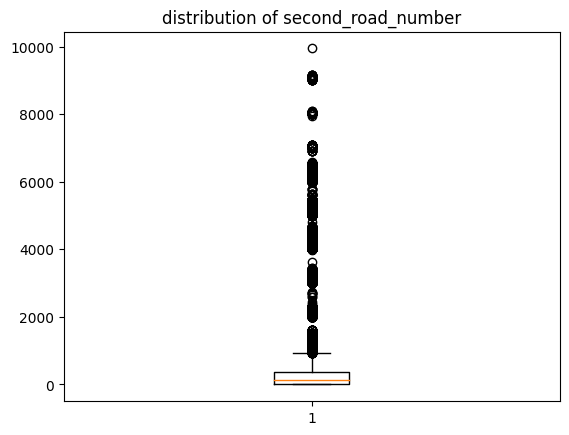

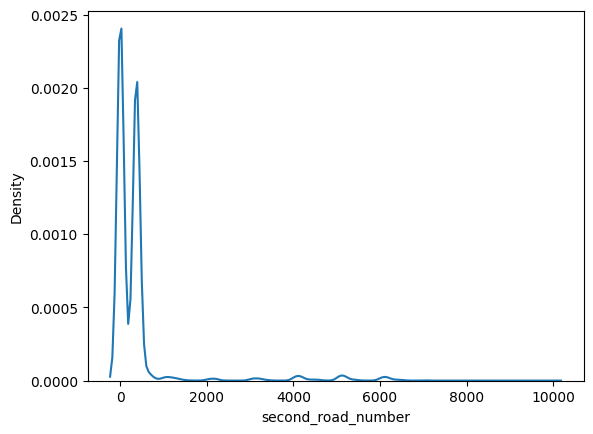

In [57]:
#detecting outliers in the second_road_number column
#the second_road_number column is positive skew
visualize(df_accident_outliers , 'second_road_number')

In [58]:
no_1 = get_number_of_outliers(df_accident_outliers , 'second_road_number')
print("the number of outliers in the second_road_number column is: " , no_1)

the number of outliers in the second_road_number column is:  12087


## Handling Outliers

for the **location_easting_osgr** and **longitude** columns we can simply drop there values as the number of outliers are very small in both of them

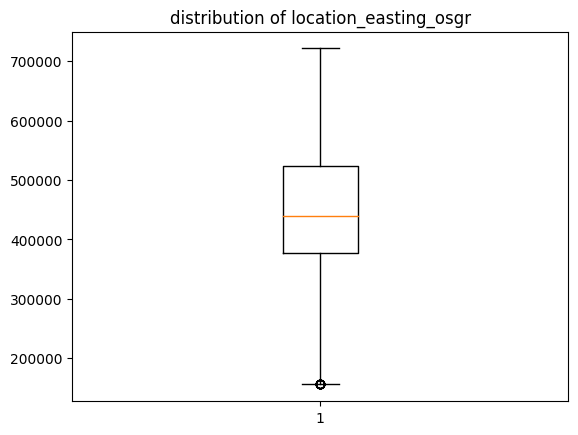

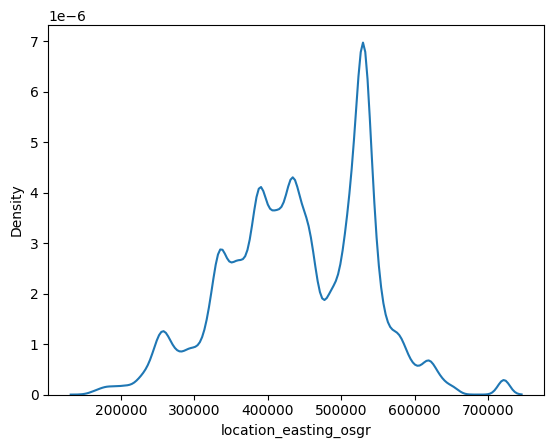

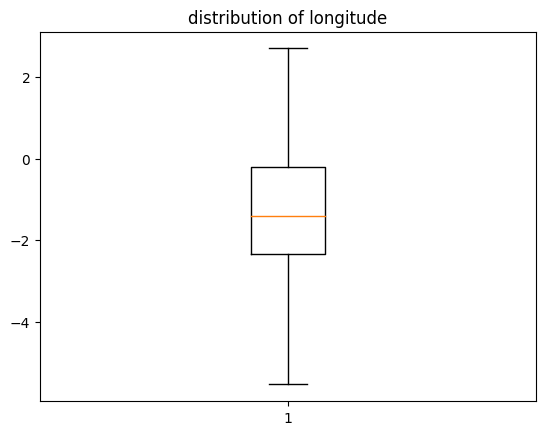

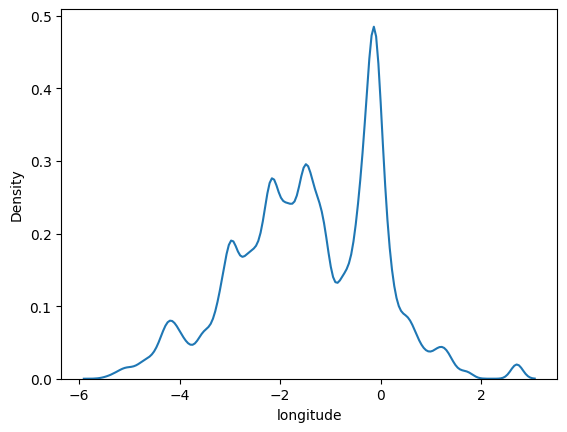

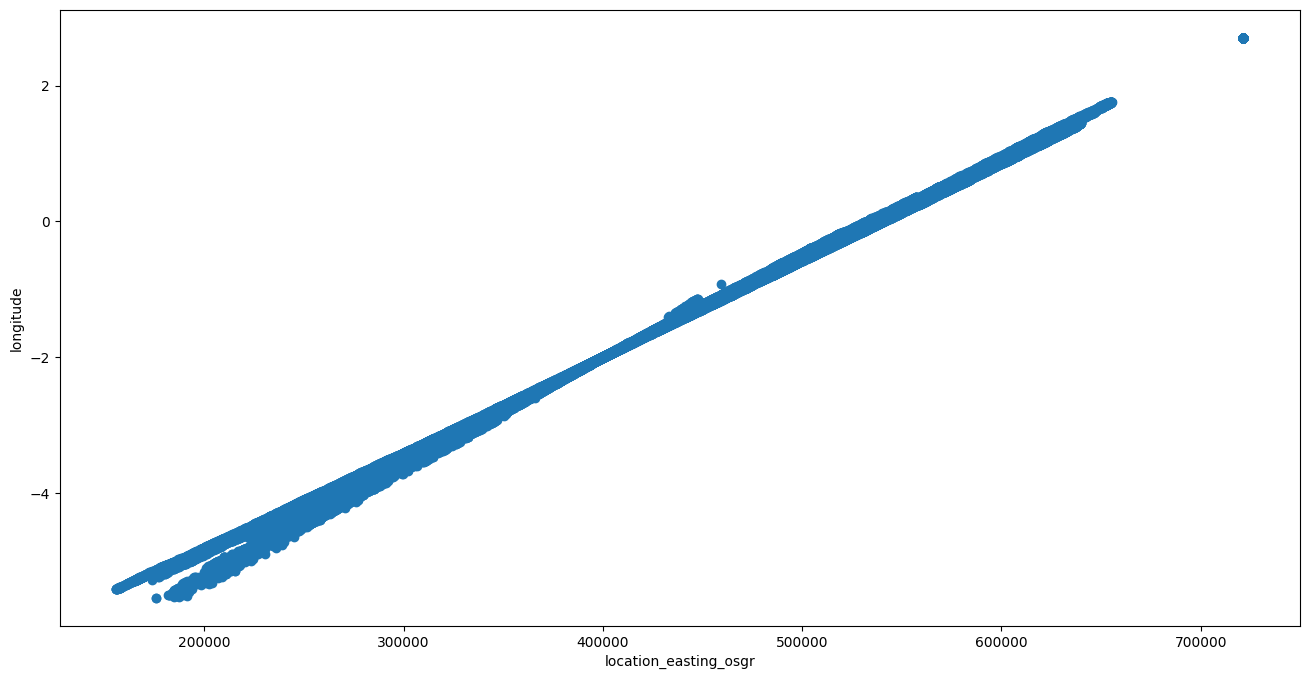

In [59]:
df_accident_outliers_1 = detecting_outliers_IQR(df_accident_outliers , 'location_easting_osgr')
df_accident_outliers_2 = detecting_outliers_IQR(df_accident_outliers_1 , 'longitude' )
visualize(df_accident_outliers_2 , 'location_easting_osgr')
visualize(df_accident_outliers_2 , 'longitude')
detecting_outliers_multivariant_scatter(df_accident_outliers_2 , 'location_easting_osgr' ,'longitude')

In [60]:
no_1 = get_number_of_outliers(df_accident_outliers_2 , 'location_easting_osgr') 
no_2 = get_number_of_outliers(df_accident_outliers_2 , 'longitude')
print("the number of outliers in location_easting_osgr column is: " , no_1)
print("the number of outliers in longitude column is: " , no_2)

the number of outliers in location_easting_osgr column is:  12
the number of outliers in longitude column is:  0


we still have outliers so we can apply this method agian on this column to get rid of these outliers

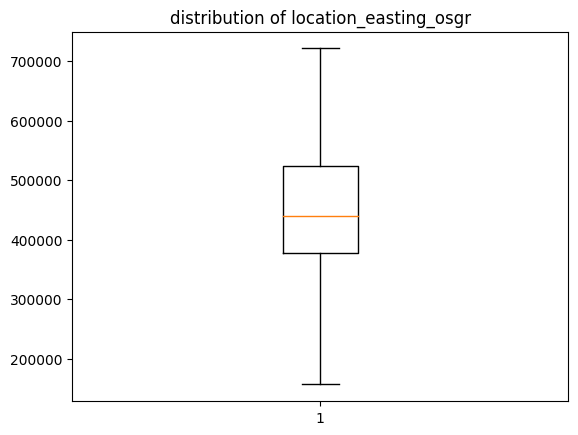

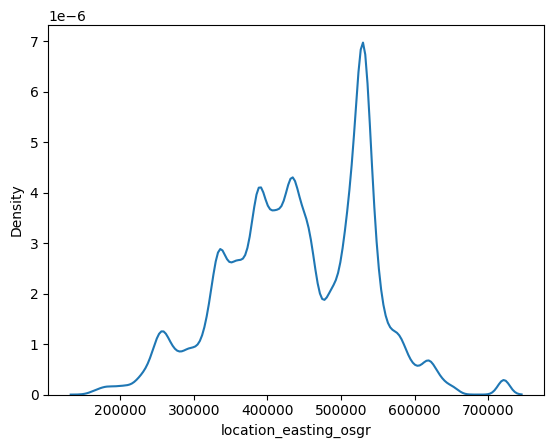

0

In [61]:
df_accident_outliers_3 = detecting_outliers_IQR(df_accident_outliers_2 , 'location_easting_osgr') 
visualize(df_accident_outliers_3 , 'location_easting_osgr' )
get_number_of_outliers(df_accident_outliers_3 , 'location_easting_osgr')

In [62]:
print("number of rows in the dataset before dropping outliers is : " , df_accident_outliers.shape[0])
print("number of rows in the dataset after dropping outliers is : " , df_accident_outliers_3.shape[0])
print("number of dropped rows is : " ,df_accident_outliers.shape[0]-df_accident_outliers_3.shape[0])

number of rows in the dataset before dropping outliers is :  235021
number of rows in the dataset after dropping outliers is :  234648
number of dropped rows is :  373


In [63]:
df_accident_outliers_3.describe()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,first_road_number,speed_limit,second_road_number,Missing_Indicator
count,234648.0,234648.000000,2.346480e+05,234648.000000,234648.000000,234648.000000,234648.000000,234648.000000,234648.000000,234648.000000,234648.000000
mean,1999.0,441312.428040,3.009410e+05,-1.412589,52.596768,1.831795,1.362679,824.425416,39.406260,372.467291,0.399360
std,0.0,95575.012995,1.607499e+05,1.405478,1.447480,0.722414,0.847532,1642.739324,14.274752,939.441804,0.489768
min,1999.0,156900.000000,1.544000e+04,-5.546931,49.995240,1.000000,1.000000,0.000000,20.000000,0.000000,0.000000
25%,1999.0,377120.000000,1.791900e+05,-2.344429,51.498704,1.000000,1.000000,0.000000,30.000000,0.000000,0.000000
50%,1999.0,439380.000000,2.685700e+05,-1.412060,52.307242,2.000000,1.000000,40.000000,30.000000,118.000000,0.000000
75%,1999.0,524060.000000,3.973000e+05,-0.208770,53.470669,2.000000,1.000000,585.000000,60.000000,372.343913,1.000000
max,1999.0,721376.085248,1.201600e+06,2.706995,60.693363,24.000000,41.000000,9777.000000,70.000000,9943.000000,1.000000


for the **location_northing_osgr** and **latitude** columns we will use the Quantile-based Flooring and Capping technique as the number of outliers is huge so we can not drop these outiers

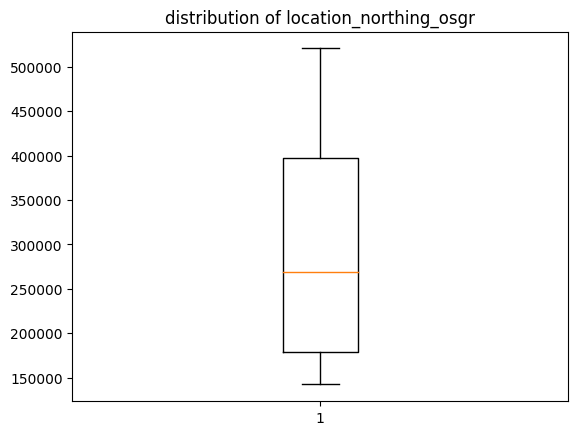

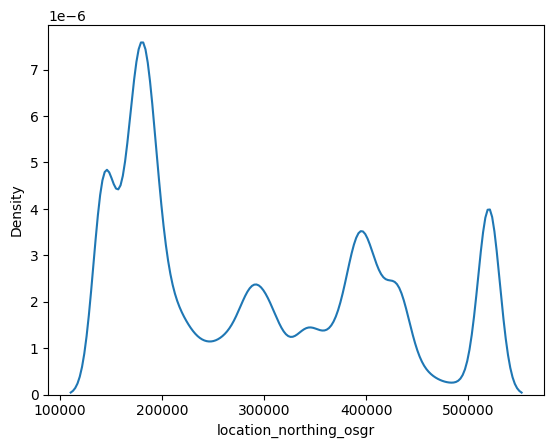

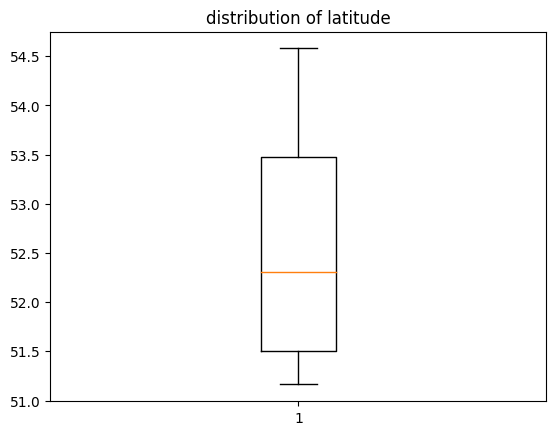

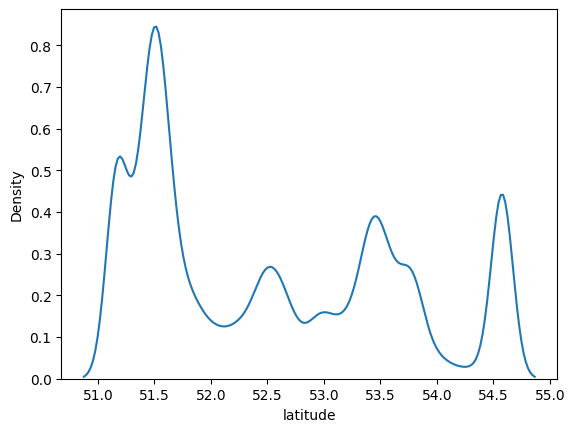

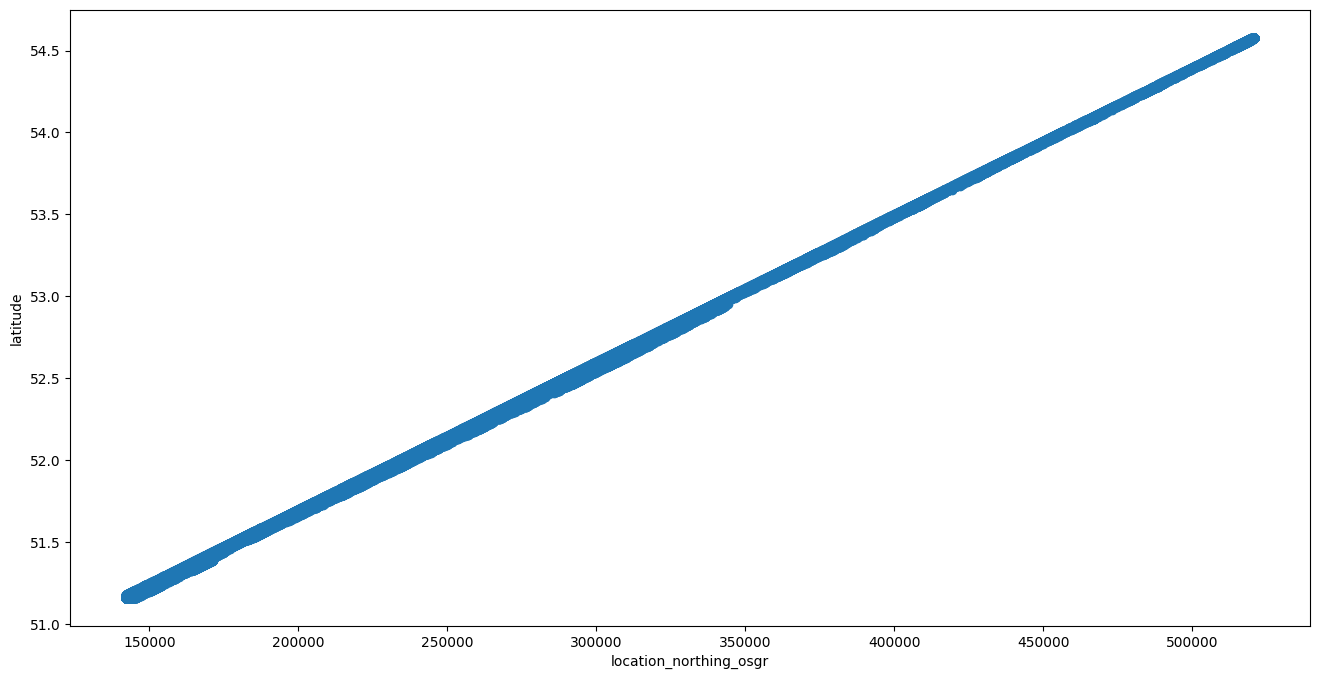

In [64]:
df_accident_outliers_4 = replacing_outliers_quantile_based(df_accident_outliers_3 , 'location_northing_osgr')
df_accident_outliers_5 = replacing_outliers_quantile_based(df_accident_outliers_4 , 'latitude')
visualize(df_accident_outliers_5 , 'location_northing_osgr')
visualize(df_accident_outliers_5 , 'latitude')
detecting_outliers_multivariant_scatter(df_accident_outliers_5 , 'location_northing_osgr' , 'latitude')

In [65]:
no_1 = get_number_of_outliers(df_accident_outliers_5 , 'location_northing_osgr') 
no_2 = get_number_of_outliers(df_accident_outliers_5 ,'latitude')
print("the number of outliers in location_northing_osgr column is: " , no_1)
print("the number of outliers in latitude column is: " , no_2)

the number of outliers in location_northing_osgr column is:  0
the number of outliers in latitude column is:  0


for the **number_of_vehicles** column we will use also the Quantile-based Flooring and Capping 

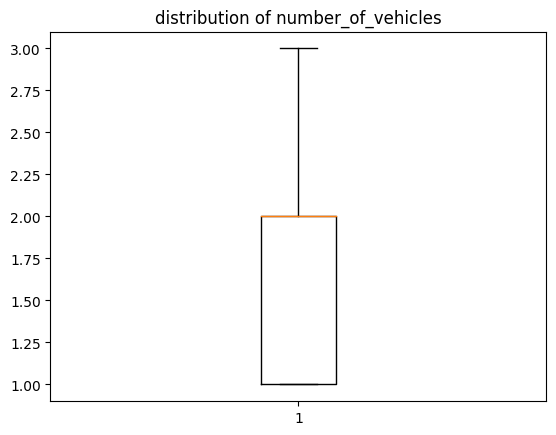

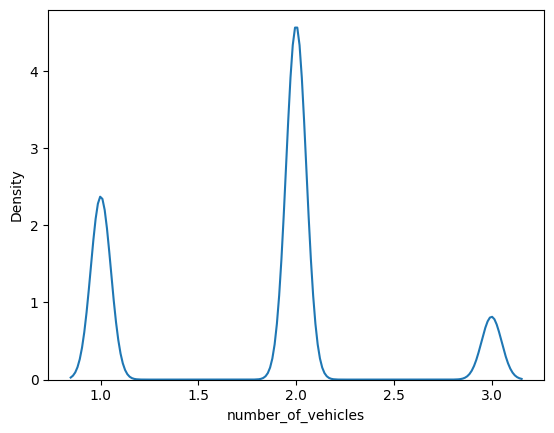

In [66]:
df_accident_outliers_6 = replacing_outliers_quantile_based(df_accident_outliers_5 , 'number_of_vehicles')
visualize(df_accident_outliers_6 , 'number_of_vehicles')

In [67]:
no_1 = get_number_of_outliers(df_accident_outliers_6, 'number_of_vehicles') 
print("the number of outliers in number_of_vehicles column is: " , no_1)

the number of outliers in number_of_vehicles column is:  0


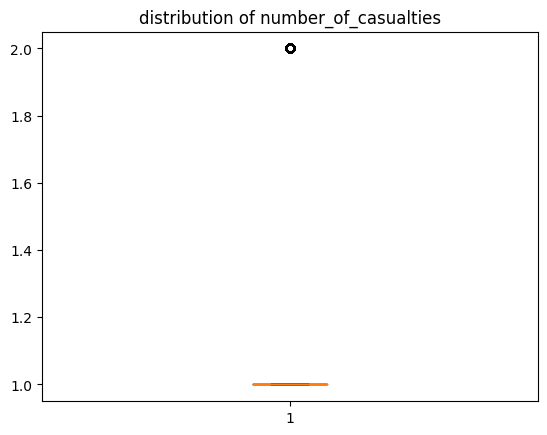

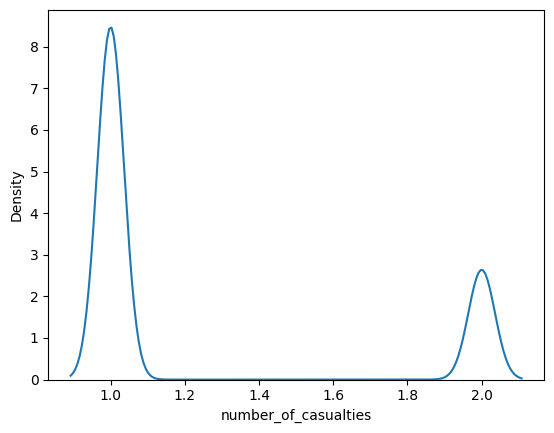

In [68]:
df_accident_outliers_7 = replacing_outliers_quantile_based(df_accident_outliers_6 , 'number_of_casualties')
visualize(df_accident_outliers_7 , 'number_of_casualties')

In [69]:
no_1 = get_number_of_outliers(df_accident_outliers_7, 'number_of_casualties') 
print("the number of outliers in number_of_casualties column is: " , no_1)

the number of outliers in number_of_casualties column is:  55730


in this section we are dealing with outlier in the **first_road_number**

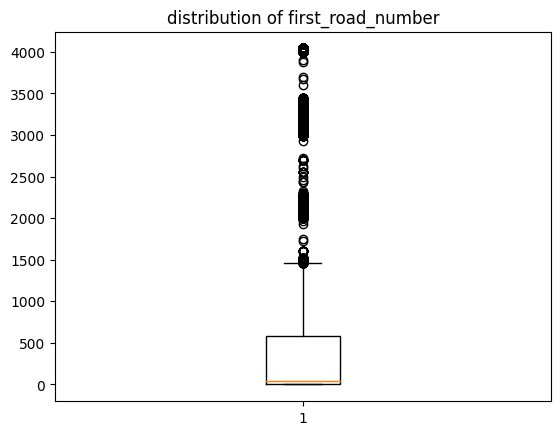

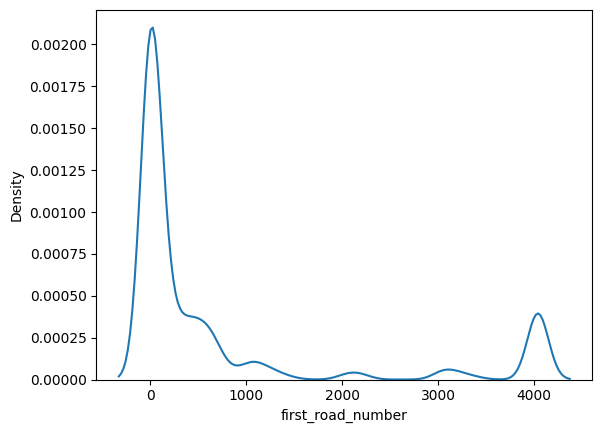

In [70]:
df_accident_outliers_8 = replacing_outliers_quantile_based(df_accident_outliers_7 , 'first_road_number')
visualize(df_accident_outliers_8 , 'first_road_number')
#create method to calculate the number of outliers in column using z-score method
def get_number_of_outliers_zscore(df , column_name):
    return df[column_name].loc[(df[column_name] > 3) | (df[column_name] < -3)].count()



In [71]:
no_1 = get_number_of_outliers(df_accident_outliers_8, 'first_road_number') 
print("the number of outliers in first_road_number column is: " , no_1)

the number of outliers in first_road_number column is:  34988


in this section we are dealing with **speed_limit** column we will use the Quantile-based Flooring and Capping technique

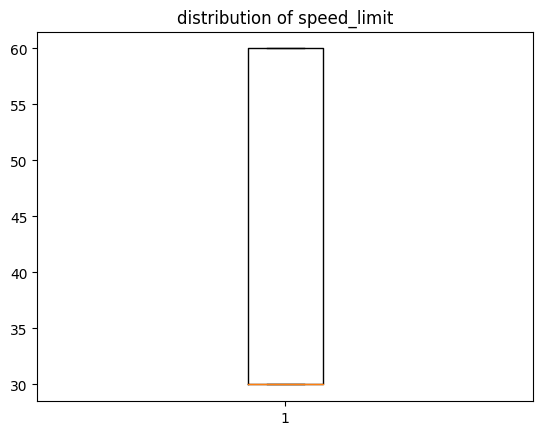

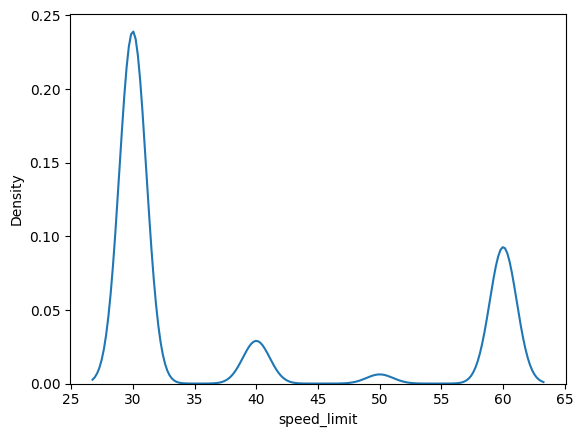

In [72]:
df_accident_outliers_9 = replacing_outliers_quantile_based(df_accident_outliers_8 , 'speed_limit')
visualize(df_accident_outliers_9 , 'speed_limit')

In [73]:
no_1 = get_number_of_outliers(df_accident_outliers_9, 'speed_limit') 
print("the number of outliers in speed_limit column is: " , no_1)

the number of outliers in speed_limit column is:  0


here we will deal with last column which is **second_road_number** column we will use the Quantile-based Flooring and Capping

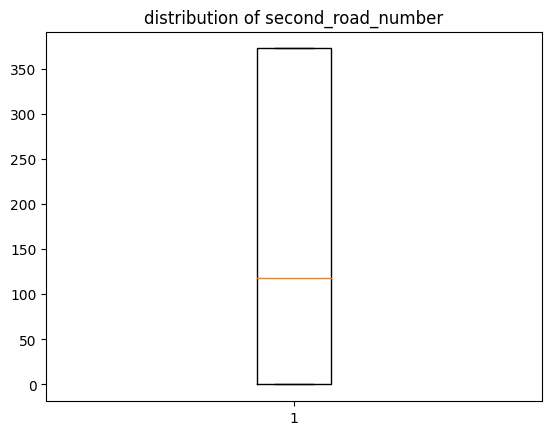

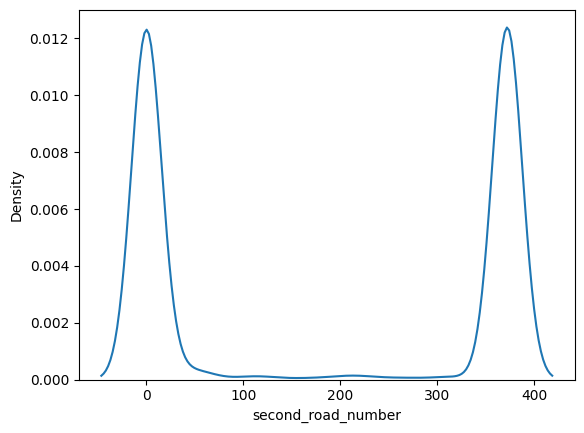

In [74]:
df_accident_outliers_10 = replacing_outliers_quantile_based(df_accident_outliers_9 , 'second_road_number')
visualize(df_accident_outliers_10 , 'second_road_number')

In [75]:
no_1 = get_number_of_outliers(df_accident_outliers_10, 'second_road_number') 
print("the number of outliers in second_road_number column is: " , no_1)

the number of outliers in second_road_number column is:  0


## Handling UncleanData

the **accident_year** and the **accident_reference** does not contain any valuable data to the dataset as all the accident happend at 1999 and the also we can get the accident reference from the accident_index column or even both of them. so we can simply drop these two columns

In [76]:
df_accident_unclean_data = df_accident_outliers_10.drop("accident_year" ,axis= 1)
df_accident_unclean_data_1 = df_accident_unclean_data.drop("accident_reference",axis =1)

In [77]:
print("The dataset shape before dropping the columns is :" , df_accident_outliers_10.shape)
print("The dataset shape after dropping the columns is :" , df_accident_unclean_data_1.shape)

The dataset shape before dropping the columns is : (234648, 34)
The dataset shape after dropping the columns is : (234648, 32)


**here we have the -1 category which indicates that the accident does not happen at an intersection between two roads but this value we need to change it  with value in more representative way**


In [78]:
df_accident_unclean_data_1.second_road_class.value_counts()

Unclassified    98221
-1              93689
A               21621
C               11006
B                8417
Motorway         1520
A(M)              174
Name: second_road_class, dtype: int64

In [79]:
df_accident_unclean_data_2 = df_accident_unclean_data_1.copy()
df_accident_unclean_data_2['second_road_class'] = df_accident_unclean_data_1['second_road_class'].replace('-1' , 'Did not happen on intersections')

In [80]:
#this is a method the gets the columns with -1 values
def get_columns_with_negative_one(df):
    temp_df = df.copy()
    return temp_df.columns[temp_df.isin(['-1']).any()].tolist()


columns_with_negative_one = get_columns_with_negative_one(df_accident_unclean_data_2)


print("the columns that have -1 value in the dataset are : " , columns_with_negative_one)

the columns that have -1 value in the dataset are :  ['local_authority_highway', 'lsoa_of_accident_location']


so we have two columns which has -1 value which indicate that there are missing values in them which are **local_authority_district** and **local_authority_highway** so we need first to find the number for missing values in these two columns then decide what to do with them

In [81]:
#method that get the number of -1 values in specific column 
def get_number_of_negative_one(df , column_name):
    return df[column_name].loc[(df[column_name] == '-1')].count()


no_1 = get_number_of_negative_one(df_accident_unclean_data_2 , 'local_authority_highway')
no_2 = get_number_of_negative_one(df_accident_unclean_data_2 , 'lsoa_of_accident_location')

print("the number of -1 values in local_authority_highway column is: " , no_1)
print("the number of -1 values in lsoa_of_accident_location column is: " , no_2)

the number of -1 values in local_authority_highway column is:  1357
the number of -1 values in lsoa_of_accident_location column is:  26190


as we can see the number of missing values in both columns are not huge so we can simply drop them 

In [82]:
# method that drop the records that have -1 values in local_authority_highway and lsoa_of_accident_location columns
def drop_records_with_negative_one(df , column_name):
    temp_df = df.copy()
    temp_df = temp_df[temp_df[column_name] != '-1']
    return temp_df

#apply the method to drop the records that have -1 values in local_authority_highway and lsoa_of_accident_location columns
df_accident_unclean_data_3 = drop_records_with_negative_one(df_accident_unclean_data_2 , 'local_authority_highway')
df_accident_unclean_data_4 = drop_records_with_negative_one(df_accident_unclean_data_3 , 'lsoa_of_accident_location')

#print the shape of the dataset before and after dropping the records that have -1 values in local_authority_highway and lsoa_of_accident_location columns
print("The dataset shape before dropping the records that have -1 values in local_authority_highway and lsoa_of_accident_location columns is :" , df_accident_unclean_data_2.shape)
print("The dataset shape after dropping the records that have -1 values in local_authority_highway and lsoa_of_accident_location columns is :" , df_accident_unclean_data_4.shape)


The dataset shape before dropping the records that have -1 values in local_authority_highway and lsoa_of_accident_location columns is : (234648, 32)
The dataset shape after dropping the records that have -1 values in local_authority_highway and lsoa_of_accident_location columns is : (207102, 32)


## Add a new column named 'Week number' and discretize the data into weeks according to the dates

In [83]:
#method that add new week_number column to the dataset and discretize the data into weeks according to the date
def add_week_number(df):
    temp_df = df.copy()
    temp_df['date'] = pd.to_datetime(temp_df['date'] ,format= '%Y-%m-%d')
    temp_df['week_number'] = temp_df['date'].dt.isocalendar().week
    return temp_df

In [84]:
df_accident_unclean_data_5 = add_week_number(df_accident_unclean_data_4)
print("the date type before converting is : " , df_accident_unclean_data_4['date'].dtype)
print("the date type after converting is : " , df_accident_unclean_data_5['date'].dtype)
df_accident_unclean_data_5.head()


the date type before converting is :  object
the date type after converting is :  datetime64[ns]


,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,Missing_Indicator,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,week_number
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1999010SU0945,519490.0,203300.0,-0.271752,51.715661,Metropolitan Police,Slight,1.0,1.0,1999-12-25,Saturday,09:30,Hertsmere,Hertsmere,Hertfordshire,Motorway,25.0,Dual carriageway,60.0,Slip road,Give way or uncontrolled,Motorway,25.000000,0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine + high winds,Dry,Rural,Yes,Trunk (Roads managed by Highways England),E01023583,51
1999010SU0946,521740.0,201070.0,-0.239977,51.695136,Metropolitan Police,Slight,2.0,1.0,1999-12-17,Friday,18:38,Hertsmere,Hertsmere,Hertfordshire,Motorway,25.0,Dual carriageway,60.0,Not at junction or within 20 metres,Data missing or out of range,Did not happen on intersections,372.343913,1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - no lighting,Fine + high winds,Dry,Rural,Yes,Trunk (Roads managed by Highways England),E01023584,50
1999010SU0947,519610.0,203240.0,-0.270037,51.715096,Metropolitan Police,Slight,2.0,2.0,1999-12-15,Wednesday,18:04,Hertsmere,Hertsmere,Hertfordshire,Motorway,25.0,Dual carriageway,60.0,Not at junction or within 20 metres,Data missing or out of range,Did not happen on intersections,372.343913,1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,Rural,Yes,Trunk (Roads managed by Highways England),E01023583,50
1999010SU0948,520090.0,202830.0,-0.263233,51.711309,Metropolitan Police,Serious,2.0,1.0,1999-12-02,Thursday,04:10,Hertsmere,Hertsmere,Hertfordshire,Motorway,25.0,Dual carriageway,60.0,Not at junction or within 20 metres,Data missing or out of range,Did not happen on intersections,372.343913,1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - no lighting,Fine no high winds,Dry,Rural,Yes,Trunk (Roads managed by Highways England),E01023583,48
1999010SU0949,522640.0,200320.0,-0.227225,51.688200,Metropolitan Police,Slight,3.0,2.0,1999-12-04,Saturday,09:51,Hertsmere,Hertsmere,Hertfordshire,A(M),1.0,One way street/Slip road,60.0,Not at junction or within 20 metres,Data missing or out of range,Did not happen on intersections,372.343913,1,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,Rural,Yes,Trunk (Roads managed by Highways England),E01023584,48


## Add columns to the dataset and convert time column to hours and minutes

In [85]:
#method that convert the time column to datetime format
def convert_time_to_datetime(df):
    temp_df = df.copy()
    temp_df['time'] = pd.to_datetime(temp_df['time'] ,format= '%H:%M')
    return temp_df

#first here we convert the time column to datetime format
df_accident_unclean_data_6 = convert_time_to_datetime(df_accident_unclean_data_5)

#print the time column type before and after converting
print("the time type before converting is : " , df_accident_unclean_data_5['time'].dtype)
print("the time type after converting is : " , df_accident_unclean_data_6['time'].dtype)


the time type before converting is :  object
the time type after converting is :  datetime64[ns]


In [86]:
#method that disceretize the date column into years , months ,days and drop the date column
def discretize_date(df):
    temp_df = df.copy()
    temp_df['year'] = temp_df['date'].dt.year
    temp_df['month'] = temp_df['date'].dt.month
    temp_df['day'] = temp_df['date'].dt.day
    temp_df = temp_df.drop('date' , axis = 1)
    return temp_df


#here we discretize the date column into years , months ,days and drop the date column
df_accident_unclean_data_7 = discretize_date(df_accident_unclean_data_6)

#printintg the shape of the dataset before and after discretizing the date column
print("the dataset shape before discretizing the date column is : " , df_accident_unclean_data_6.shape)
print("the dataset shape after discretizing the date column is : " , df_accident_unclean_data_7.shape)

the dataset shape before discretizing the date column is :  (207102, 33)
the dataset shape after discretizing the date column is :  (207102, 35)


In [87]:
#method that disceretize the time column into hours , minutes and drop the time column
def discretize_time(df):
    temp_df = df.copy()
    temp_df['hour'] = temp_df['time'].dt.hour
    temp_df['minute'] = temp_df['time'].dt.minute
    temp_df = temp_df.drop('time' , axis = 1)
    return temp_df

#here we discretize the time column into hours , minutes and drop the time column
df_accident_unclean_data_8 = discretize_time(df_accident_unclean_data_7)

#printintg the shape of the dataset before and after discretizing the time column
print("the dataset shape before discretizing the time column is : " , df_accident_unclean_data_7.shape)
print("the dataset shape after discretizing the time column is : " , df_accident_unclean_data_8.shape)

the dataset shape before discretizing the time column is :  (207102, 35)
the dataset shape after discretizing the time column is :  (207102, 36)


## Add Column indicating whether the accident was on a weekend or not

In [88]:
#method that Add Column indicating whether the accident was on a weekend or not
def add_weekend_column(df):
    temp_df = df.copy()
    temp_df['weekend'] = temp_df['day_of_week'].apply(lambda x : 1 if x in ['Saturday' , 'Sunday'] else 0)
    return temp_df

#here we Add Column indicating whether the accident was on a weekend or not
df_accident_unclean_data_9 = add_weekend_column(df_accident_unclean_data_8)

#printintg the shape of the dataset before and after adding the weekend column
print("the dataset shape before adding the weekend column is : " , df_accident_unclean_data_8.shape)
print("the dataset shape after adding the weekend column is : " , df_accident_unclean_data_9.shape)

    

the dataset shape before adding the weekend column is :  (207102, 36)
the dataset shape after adding the weekend column is :  (207102, 37)


In [136]:
#adding column indicating whether the accident was on the morning or not
df_accident_unclean_data_9['morning'] = df_accident_unclean_data_9['hour'].apply(lambda x: 1 if x < 12 else 0)

In [138]:
df_accident_unclean_data_9.head()

,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,Missing_Indicator,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,week_number,year,month,day,hour,minute,weekend,morning
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1999010SU0945,519490.0,203300.0,-0.271752,51.715661,Metropolitan Police,Slight,1.0,1.0,Saturday,Hertsmere,Hertsmere,Hertfordshire,Motorway,25.0,Dual carriageway,60.0,Slip road,Give way or uncontrolled,Motorway,25.000000,0,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine + high winds,Dry,Rural,Yes,Trunk (Roads managed by Highways England),E01023583,51,1999,12,25,9,30,1,1
1999010SU0946,521740.0,201070.0,-0.239977,51.695136,Metropolitan Police,Slight,2.0,1.0,Friday,Hertsmere,Hertsmere,Hertfordshire,Motorway,25.0,Dual carriageway,60.0,Not at junction or within 20 metres,Data missing or out of range,Did not happen on intersections,372.343913,1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - no lighting,Fine + high winds,Dry,Rural,Yes,Trunk (Roads managed by Highways England),E01023584,50,1999,12,17,18,38,0,0
1999010SU0947,519610.0,203240.0,-0.270037,51.715096,Metropolitan Police,Slight,2.0,2.0,Wednesday,Hertsmere,Hertsmere,Hertfordshire,Motorway,25.0,Dual carriageway,60.0,Not at junction or within 20 metres,Data missing or out of range,Did not happen on intersections,372.343913,1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,Rural,Yes,Trunk (Roads managed by Highways England),E01023583,50,1999,12,15,18,4,0,0
1999010SU0948,520090.0,202830.0,-0.263233,51.711309,Metropolitan Police,Serious,2.0,1.0,Thursday,Hertsmere,Hertsmere,Hertfordshire,Motorway,25.0,Dual carriageway,60.0,Not at junction or within 20 metres,Data missing or out of range,Did not happen on intersections,372.343913,1,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - no lighting,Fine no high winds,Dry,Rural,Yes,Trunk (Roads managed by Highways England),E01023583,48,1999,12,2,4,10,0,1
1999010SU0949,522640.0,200320.0,-0.227225,51.688200,Metropolitan Police,Slight,3.0,2.0,Saturday,Hertsmere,Hertsmere,Hertfordshire,A(M),1.0,One way street/Slip road,60.0,Not at junction or within 20 metres,Data missing or out of range,Did not happen on intersections,372.343913,1,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,Rural,Yes,Trunk (Roads managed by Highways England),E01023584,48,1999,12,4,9,51,1,1


## Categorical Feature encoding 

In [139]:
#method that count the number of unique values in dataset for categorical features
def count_unique_values(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            print("The number of unique values in " , col , " is " , df[col].nunique())
count_unique_values(df_accident_unclean_data_9)

The number of unique values in  police_force  is  3
The number of unique values in  accident_severity  is  3
The number of unique values in  day_of_week  is  7
The number of unique values in  local_authority_district  is  350
The number of unique values in  local_authority_ons_district  is  322
The number of unique values in  local_authority_highway  is  152
The number of unique values in  first_road_class  is  6
The number of unique values in  road_type  is  4
The number of unique values in  junction_detail  is  10
The number of unique values in  junction_control  is  5
The number of unique values in  second_road_class  is  7
The number of unique values in  pedestrian_crossing_human_control  is  4
The number of unique values in  pedestrian_crossing_physical_facilities  is  7
The number of unique values in  light_conditions  is  6
The number of unique values in  weather_conditions  is  10
The number of unique values in  road_surface_conditions  is  8
The number of unique values in  urb

## methods for encoding categorical features

In [140]:

#apply one hot encoding to the categorical features
def one_hot_encoding(df , col_name):
    temp_df = df.copy()
    temp_df = pd.get_dummies(temp_df , columns = [col_name])
    return temp_df
#method that takes the dataset and column and apply label encoding on it and 
def label_encoding(df , col_name):
    temp_df = df.copy()
    if(col_name == 'accident_severity'):
        temp_df[col_name] = temp_df[col_name].apply(lambda x : 0 if x == 'Slight' else 1 if x == 'Serious' else 2)
    le = LabelEncoder()
    temp_df[col_name] = le.fit_transform(temp_df[col_name])
    return temp_df

#method that takes the dataset and column and apply frequency encoding on it
def frequency_encoding(df , col_name):
    temp_df = df.copy()
    temp_df[col_name] = temp_df[col_name].map(temp_df[col_name].value_counts(normalize=True))
    return temp_df

#method to plot rare labels in categorical features
def plot_rare_labels(df, variable, rare_perc):
    temp = df.groupby([variable])[variable].count()/len(df)
    temp_df = pd.DataFrame(temp) 
    plt.figure(figsize=(16, 6))
    temp_df[variable].sort_values(ascending=False).plot.bar()
    plt.axhline(y=rare_perc, color='r', linestyle='-')
    plt.title(variable)
    plt.show()
    
#method to replace rare labels in categorical features
def rare_label_encoding(df, variable, rare_perc):
    temp = df.groupby([variable])[variable].count()/len(df)
    rare_labels = temp[temp<rare_perc].index 
    df[variable] = np.where(df[variable].isin(rare_labels),'Rare', df[variable])
    return df

here we will take each column and apply the categorical encoding to it 

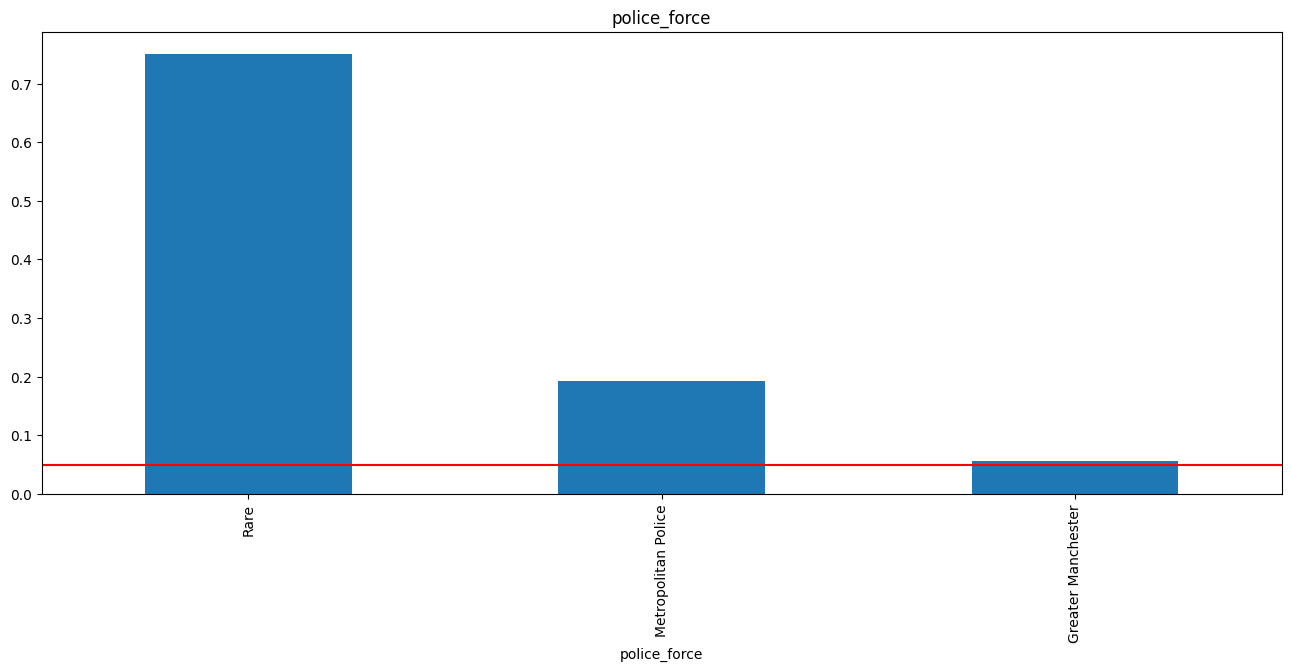

In [141]:
#plot the rare lables in the ploice force column
plot_rare_labels(df_accident_unclean_data_9, 'police_force', 0.05)

as we can see the **police_force** column has 51 unique values and 49 of them are rare so we will use the **rare label encoding** technique to encdoe it then we will use the **one hot encoding** technique to encode the rest of the columns

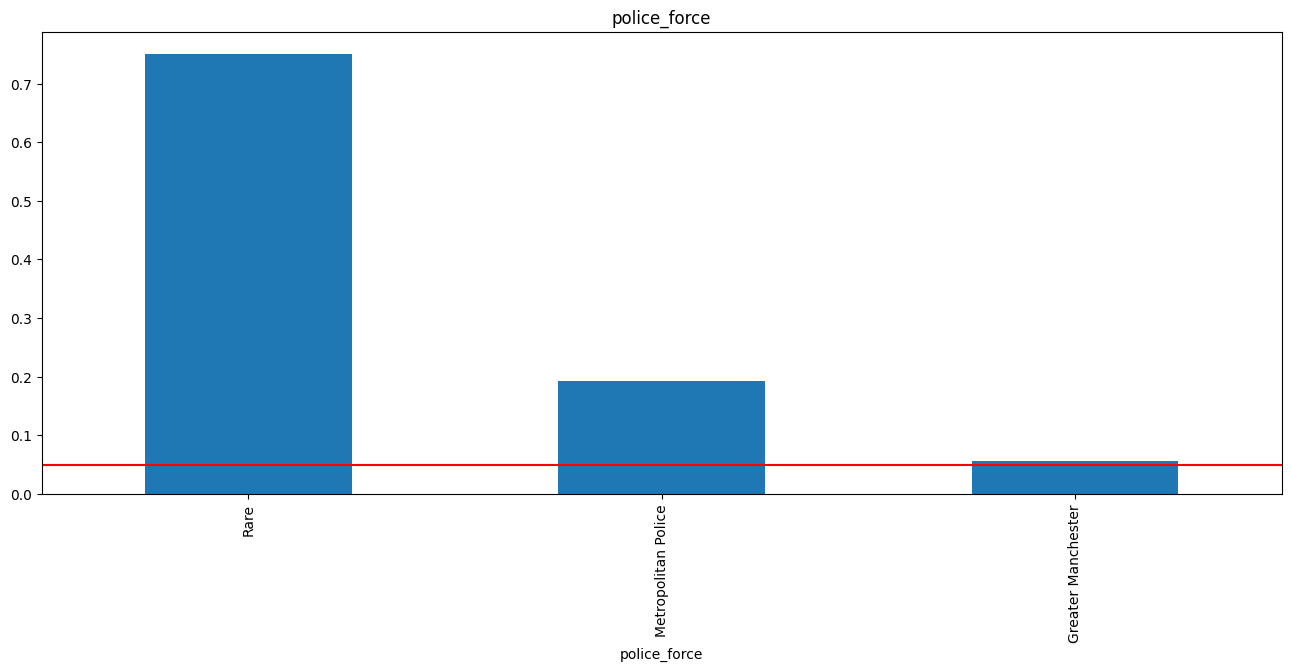

In [142]:
#apply rare label encoding on the police force column
df_accident_encoding = rare_label_encoding(df_accident_unclean_data_9, 'police_force', 0.05)


plot_rare_labels(df_accident_encoding, 'police_force', 0.05)

In [143]:
#apply one hot encoding on the police force column
df_accident_encoding_1 = one_hot_encoding(df_accident_encoding , 'police_force')

df_accident_encoding_1.head()
#print the shape of the dataset before and after encoding
print("the dataset shape before encoding is : " , df_accident_unclean_data_9.shape)
print("the dataset shape after encoding is : " , df_accident_encoding_1.shape)

the dataset shape before encoding is :  (207102, 38)
the dataset shape after encoding is :  (207102, 40)


dealing with the **accident_severity** column we will use the **Label Encoding** technique as it flows ordinality 

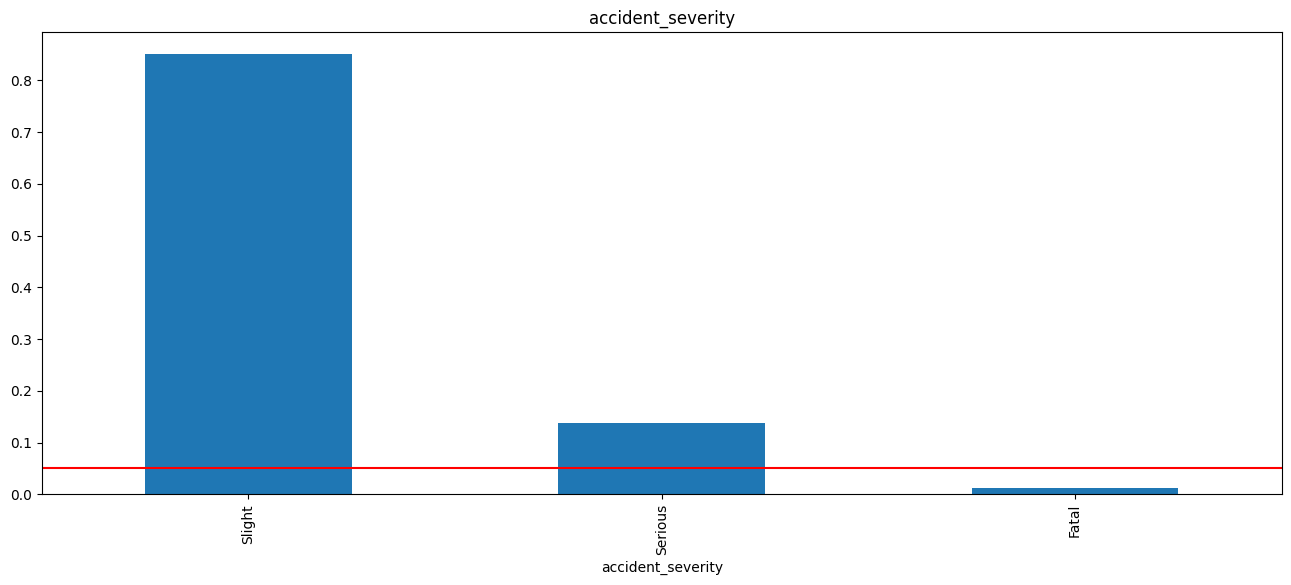

In [144]:
#plot the rare lables in the accident severity column
plot_rare_labels(df_accident_encoding_1, 'accident_severity', 0.05)

In [145]:
#apply lable encoding on the accident severity column 
df_accident_encoding_2 = label_encoding(df_accident_encoding_1 , 'accident_severity')

#print the labels in the accident severity column before and after encoding
print("the labels in the accident severity column before encoding is : " , df_accident_encoding_1['accident_severity'].unique())
print("the labels in the accident severity column after encoding is : " , df_accident_encoding_2['accident_severity'].unique())

the labels in the accident severity column before encoding is :  ['Slight' 'Serious' 'Fatal']
the labels in the accident severity column after encoding is :  [0 1 2]


In [146]:
#method that return dataframe with the two columns that are encoded and their mapped values 
def merge_two_columns(temp_df , df1 , df2 , col_name):
    temp_df1 = df1.copy()
    temp_df2 = df2.copy()
    temp_df[col_name] = temp_df1[col_name]
    temp_df[col_name + '_mapped'] = temp_df2[col_name]
    return temp_df
temp_df = pd.DataFrame()
temp_df = merge_two_columns(temp_df ,df_accident_encoding_1 , df_accident_encoding_2 , 'accident_severity')
temp_df

,accident_severity,accident_severity_mapped
accident_index,,
1999010SU0945,Slight,0
1999010SU0946,Slight,0
1999010SU0947,Slight,0
1999010SU0948,Serious,1
1999010SU0949,Slight,0
...,...,...
1999559W06351,Slight,0
1999559W06369,Slight,0
1999559W06371,Slight,0


dealing with **day_of_week** column we will use the **frequency encoding** technique as it has 7 unique values and the frequency of each value is not same

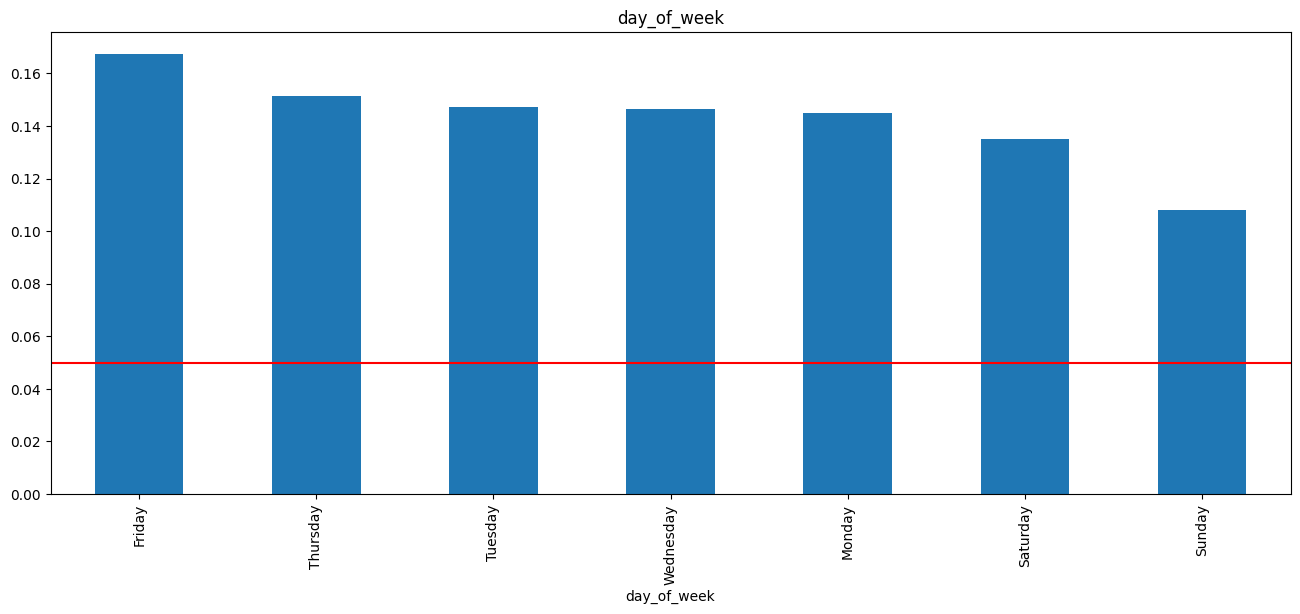

In [147]:
#plot the rare lables in the day of week column
plot_rare_labels(df_accident_encoding_2, 'day_of_week', 0.05)


In [148]:
#apply frequency encoding on the day of week column
df_accident_encoding_3 = frequency_encoding(df_accident_encoding_2 , 'day_of_week')

#print the unique values in the day of week column before and after encoding
print("the unique values in the day of week column before encoding is : " , df_accident_encoding_2['day_of_week'].unique())
print("the unique values in the day of week column after encoding is : " , df_accident_encoding_3['day_of_week'].unique())

the unique values in the day of week column before encoding is :  ['Saturday' 'Friday' 'Wednesday' 'Thursday' 'Tuesday' 'Monday' 'Sunday']
the unique values in the day of week column after encoding is :  [0.13490454 0.16731369 0.14644958 0.15118637 0.14734286 0.14476924
 0.10803372]


In [149]:
#merge the two columns that are encoded and their mapped values
temp_df_1 = merge_two_columns(temp_df ,df_accident_encoding_2 , df_accident_encoding_3 , 'day_of_week')
temp_df_1

,accident_severity,accident_severity_mapped,day_of_week,day_of_week_mapped
accident_index,,,,
1999010SU0945,Slight,0,Saturday,0.134905
1999010SU0946,Slight,0,Friday,0.167314
1999010SU0947,Slight,0,Wednesday,0.146450
1999010SU0948,Serious,1,Thursday,0.151186
1999010SU0949,Slight,0,Saturday,0.134905
...,...,...,...,...
1999559W06351,Slight,0,Wednesday,0.146450
1999559W06369,Slight,0,Thursday,0.151186
1999559W06371,Slight,0,Thursday,0.151186


dealing with the **local_authority_district** , **local_authority_ons_district** and **local_authority_highway** columns we will use the **Label encoding** technique as they have a lot of unique values.

In [150]:
#apply label encoding on the local authority district column 
df_accident_encoding_4 = label_encoding(df_accident_encoding_3 , 'local_authority_district')

#apply label encoding on the local_authority_ons_district column
df_accident_encoding_5 = label_encoding(df_accident_encoding_4 , 'local_authority_ons_district')

#apply label encoding on the local_authority_highway column
df_accident_encoding_6 = label_encoding(df_accident_encoding_5 , 'local_authority_highway')

In [151]:
#merge two columns 
temp_df_2 = merge_two_columns(temp_df_1 ,df_accident_encoding_3 , df_accident_encoding_4 ,'local_authority_district')
temp_df_3 = merge_two_columns(temp_df_2 ,df_accident_encoding_4 , df_accident_encoding_5 ,'local_authority_ons_district')
temp_df_4 = merge_two_columns(temp_df_3 ,df_accident_encoding_5 , df_accident_encoding_6 , 'local_authority_highway')
temp_df_4

,accident_severity,accident_severity_mapped,day_of_week,day_of_week_mapped,local_authority_district,local_authority_district_mapped,local_authority_ons_district,local_authority_ons_district_mapped,local_authority_highway,local_authority_highway_mapped
accident_index,,,,,,,,,,
1999010SU0945,Slight,0,Saturday,0.134905,Hertsmere,136,Hertsmere,126,Hertfordshire,55
1999010SU0946,Slight,0,Friday,0.167314,Hertsmere,136,Hertsmere,126,Hertfordshire,55
1999010SU0947,Slight,0,Wednesday,0.146450,Hertsmere,136,Hertsmere,126,Hertfordshire,55
1999010SU0948,Serious,1,Thursday,0.151186,Hertsmere,136,Hertsmere,126,Hertfordshire,55
1999010SU0949,Slight,0,Saturday,0.134905,Hertsmere,136,Hertsmere,126,Hertfordshire,55
...,...,...,...,...,...,...,...,...,...,...
1999559W06351,Slight,0,Wednesday,0.146450,Weymouth and Portland,335,Weymouth and Portland,306,Dorset,36
1999559W06369,Slight,0,Thursday,0.151186,West Dorset,328,West Dorset,300,Dorset,36
1999559W06371,Slight,0,Thursday,0.151186,Weymouth and Portland,335,Weymouth and Portland,306,Dorset,36


deal with the rest of the columns we will use **one hot encoding** technique as they do not have a lot of unique values except for the **lsoa_of_accident_location** 

In [152]:
#apply one hot encoding on the first_road_class column
df_accident_encoding_7 = one_hot_encoding(df_accident_encoding_6 , 'first_road_class')

#apply one hot encoding on the road_type column
df_accident_encoding_8 = one_hot_encoding(df_accident_encoding_7 , 'road_type')

#apply one hot encoding on the junction_detail column
df_accident_encoding_9 = one_hot_encoding(df_accident_encoding_8 , 'junction_detail')

#apply one hot encoding on the junction_control column
df_accident_encoding_10 = one_hot_encoding(df_accident_encoding_9 , 'junction_control')

#apply one hot encoding on the second_road_class column
df_accident_encoding_11 = one_hot_encoding(df_accident_encoding_10 , 'second_road_class')

#apply one hot encoding on the pedestrian_crossing-human_control column
df_accident_encoding_12 = one_hot_encoding(df_accident_encoding_11 , 'pedestrian_crossing_human_control')

#apply one hot encoding on the pedestrian_crossing-physical_facilities column
df_accident_encoding_13 = one_hot_encoding(df_accident_encoding_12 , 'pedestrian_crossing_physical_facilities')

# apply one hot encoding on the light_conditions column
df_accident_encoding_14 = one_hot_encoding(df_accident_encoding_13 , 'light_conditions')

#apply one hot encoding on the weather_conditions column
df_accident_encoding_15 = one_hot_encoding(df_accident_encoding_14 , 'weather_conditions')

#apply one hot encoding on the road_surface_conditions column
df_accident_encoding_16 = one_hot_encoding(df_accident_encoding_15 , 'road_surface_conditions')

#apply one hot encoding on the urban_or_rural_area column
df_accident_encoding_17 = one_hot_encoding(df_accident_encoding_16 , 'urban_or_rural_area')

#apply one hot encoding on the did_police_officer_attend_scene_of_accident column
df_accident_encoding_18 = one_hot_encoding(df_accident_encoding_17 , 'did_police_officer_attend_scene_of_accident')

#apply one hot encoding on the trunk_road_flag column
df_accident_encoding_19 = one_hot_encoding(df_accident_encoding_18 , 'trunk_road_flag')



In [153]:
df_accident_encoding_19.shape

(207102, 102)

In [154]:
df_accident_encoding_19.head()

,location_easting_osgr,location_northing_osgr,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_number,speed_limit,second_road_number,Missing_Indicator,lsoa_of_accident_location,week_number,year,month,day,hour,minute,weekend,morning,police_force_Greater Manchester,police_force_Metropolitan Police,police_force_Rare,first_road_class_A,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway,first_road_class_Unclassified,road_type_Dual carriageway,road_type_One way street/Slip road,road_type_Roundabout,road_type_Single carriageway,junction_detail_Crossroads,junction_detail_Data missing or out of range,junction_detail_Mini-roundabout,junction_detail_More than 4 arms (not roundabout),junction_detail_Not at junction or within 20 metres,junction_detail_Other junction,junction_detail_Private drive or entrance,junction_detail_Roundabout,junction_detail_Slip road,junction_detail_T or staggered junction,junction_control_Authorised person,junction_control_Auto traffic signal,junction_control_Data missing or out of range,junction_control_Give way or uncontrolled,junction_control_Stop sign,second_road_class_A,second_road_class_A(M),second_road_class_B,second_road_class_C,second_road_class_Did not happen on intersections,second_road_class_Motorway,second_road_class_Unclassified,pedestrian_crossing_human_control_Control by other authorised person,pedestrian_crossing_human_control_Control by school crossing patrol,pedestrian_crossing_human_control_Data missing or out of range,pedestrian_crossing_human_control_None within 50 metres,pedestrian_crossing_physical_facilities_Central refuge,pedestrian_crossing_physical_facilities_Data missing or out of range,pedestrian_crossing_physical_facilities_Footbridge or subway,pedestrian_crossing_physical_facilities_No physical crossing facilities within 50 metres,pedestrian_crossing_physical_facilities_Pedestrian phase at traffic signal junction,"pedestrian_crossing_physical_facilities_Pelican, puffin, toucan or similar non-junction pedestrian light crossing",pedestrian_crossing_physical_facilities_Zebra,light_conditions_Darkness - lighting unknown,light_conditions_Darkness - lights lit,light_conditions_Darkness - lights unlit,light_conditions_Darkness - no lighting,light_conditions_Data missing or out of range,light_conditions_Daylight,weather_conditions_Data missing or out of range,weather_conditions_Fine + high winds,weather_conditions_Fine no high winds,weather_conditions_Fog or mist,weather_conditions_Missing,weather_conditions_Other,weather_conditions_Raining + high winds,weather_conditions_Raining no high winds,weather_conditions_Snowing + high winds,weather_conditions_Snowing no high winds,road_surface_conditions_Data missing or out of range,road_surface_conditions_Dry,road_surface_conditions_Flood over 3cm. deep,road_surface_conditions_Frost or ice,road_surface_conditions_Mud,road_surface_conditions_Oil or diesel,road_surface_conditions_Snow,road_surface_conditions_Wet or damp,urban_or_rural_area_Rural,urban_or_rural_area_Urban,did_police_officer_attend_scene_of_accident_Data missing or out of range,did_police_officer_attend_scene_of_accident_No,did_police_officer_attend_scene_of_accident_Yes,trunk_road_flag_Data missing or out of range,trunk_road_flag_Non-trunk,trunk_road_flag_Trunk (Roads managed by Highways England)
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1999010SU0945,519490.0,203300.0,-0.271752,51.715661,0,1.0,1.0,0.134905,136,126,55,25.0,60.0,25.000000,0,E01023583,51,1999,12,25,9,30,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1
1999010SU0946,521740.0,201070.0,-0.239977,51.695136,0,2.0,1.0,0.167314,136,126,55,25.0,60.0,372.343913,1,E01023584,50,1999,12

In [155]:
df_accident_encoding_19.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207102 entries, 1999010SU0945 to 1999559W06379
Columns: 102 entries, location_easting_osgr to trunk_road_flag_Trunk (Roads managed by Highways England)
dtypes: UInt32(1), float64(10), int32(4), int64(8), object(1), uint8(78)
memory usage: 51.2+ MB


In [156]:
df_accident_encoding = df_accident_unclean_data_9.copy()
#this a method to to get the first cahracter in the lsoa_of_accident_location column
def get_first_character_of_lsoa_of_accident_location(df):
    temp_df = df.copy()
    temp_df['lsoa_of_accident_location'] = temp_df['lsoa_of_accident_location'].astype(str)
    temp_df['lsoa_of_accident_location'] = temp_df['lsoa_of_accident_location'].apply(lambda x : x[0])
    return temp_df['lsoa_of_accident_location'].unique()

lsoa_of_accident_location_list = get_first_character_of_lsoa_of_accident_location(df_accident_encoding)

lsoa_of_accident_location_list
 
 

array(['E', 'W'], dtype=object)

as we can see the **lsao_of_accident_location** column has two unique ['E', 'W'] values followed by numbers so we can encode this column into two columns as **lsao_of_accident_location_E_W**  and **lsao_of_accident_location_numbers**

In [157]:
def encode_lsoa_of_accident_location(df):
    temp_df = df.copy()
    temp_df_1 = df.copy()
    temp_df_2 = df.copy()
    temp_df_1['lsoa_of_accident_location'] = temp_df_1['lsoa_of_accident_location'].astype(str)
    temp_df_1['lsoa_of_accident_location'] = temp_df_1['lsoa_of_accident_location'].apply(lambda x : x[0])
    temp_df['lsoa_of_accident_location_E_W'] = temp_df_1['lsoa_of_accident_location'].apply(lambda x : 1 if x == 'E' else 0)
    temp_df_2['lsoa_of_accident_location'] = temp_df_2['lsoa_of_accident_location'].astype(str)
    temp_df_2['lsoa_of_accident_location'] = temp_df_2['lsoa_of_accident_location'].apply(lambda x : x[1:])
    temp_df['lsoa_of_accident_location_number'] = temp_df_2['lsoa_of_accident_location'].astype(int)
    temp_df = temp_df.drop(['lsoa_of_accident_location'], axis = 1)
    return temp_df

#apply the encode_lsoa_of_accident_location method
df_accident_encoding_20 = encode_lsoa_of_accident_location(df_accident_encoding_19)


df_accident_encoding_20.head()

,location_easting_osgr,location_northing_osgr,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_number,speed_limit,second_road_number,Missing_Indicator,week_number,year,month,day,hour,minute,weekend,morning,police_force_Greater Manchester,police_force_Metropolitan Police,police_force_Rare,first_road_class_A,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway,first_road_class_Unclassified,road_type_Dual carriageway,road_type_One way street/Slip road,road_type_Roundabout,road_type_Single carriageway,junction_detail_Crossroads,junction_detail_Data missing or out of range,junction_detail_Mini-roundabout,junction_detail_More than 4 arms (not roundabout),junction_detail_Not at junction or within 20 metres,junction_detail_Other junction,junction_detail_Private drive or entrance,junction_detail_Roundabout,junction_detail_Slip road,junction_detail_T or staggered junction,junction_control_Authorised person,junction_control_Auto traffic signal,junction_control_Data missing or out of range,junction_control_Give way or uncontrolled,junction_control_Stop sign,second_road_class_A,second_road_class_A(M),second_road_class_B,second_road_class_C,second_road_class_Did not happen on intersections,second_road_class_Motorway,second_road_class_Unclassified,pedestrian_crossing_human_control_Control by other authorised person,pedestrian_crossing_human_control_Control by school crossing patrol,pedestrian_crossing_human_control_Data missing or out of range,pedestrian_crossing_human_control_None within 50 metres,pedestrian_crossing_physical_facilities_Central refuge,pedestrian_crossing_physical_facilities_Data missing or out of range,pedestrian_crossing_physical_facilities_Footbridge or subway,pedestrian_crossing_physical_facilities_No physical crossing facilities within 50 metres,pedestrian_crossing_physical_facilities_Pedestrian phase at traffic signal junction,"pedestrian_crossing_physical_facilities_Pelican, puffin, toucan or similar non-junction pedestrian light crossing",pedestrian_crossing_physical_facilities_Zebra,light_conditions_Darkness - lighting unknown,light_conditions_Darkness - lights lit,light_conditions_Darkness - lights unlit,light_conditions_Darkness - no lighting,light_conditions_Data missing or out of range,light_conditions_Daylight,weather_conditions_Data missing or out of range,weather_conditions_Fine + high winds,weather_conditions_Fine no high winds,weather_conditions_Fog or mist,weather_conditions_Missing,weather_conditions_Other,weather_conditions_Raining + high winds,weather_conditions_Raining no high winds,weather_conditions_Snowing + high winds,weather_conditions_Snowing no high winds,road_surface_conditions_Data missing or out of range,road_surface_conditions_Dry,road_surface_conditions_Flood over 3cm. deep,road_surface_conditions_Frost or ice,road_surface_conditions_Mud,road_surface_conditions_Oil or diesel,road_surface_conditions_Snow,road_surface_conditions_Wet or damp,urban_or_rural_area_Rural,urban_or_rural_area_Urban,did_police_officer_attend_scene_of_accident_Data missing or out of range,did_police_officer_attend_scene_of_accident_No,did_police_officer_attend_scene_of_accident_Yes,trunk_road_flag_Data missing or out of range,trunk_road_flag_Non-trunk,trunk_road_flag_Trunk (Roads managed by Highways England),lsoa_of_accident_location_E_W,lsoa_of_accident_location_number
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1999010SU0945,519490.0,203300.0,-0.271752,51.715661,0,1.0,1.0,0.134905,136,126,55,25.0,60.0,25.000000,0,51,1999,12,25,9,30,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,1023583
1999010SU0946,521740.0,201070.0,-0.239977,51.695136,0,2.0,1.0,0.167314,136,126,55,25.0,

In [158]:
#merge the old and new columns in both dataframes
df_accident_encoding_temp = df_accident_encoding_19.copy()
df_accident_encoding_temp['lsoa_of_accident_location_E_W'] = df_accident_encoding_19['lsoa_of_accident_location'].astype(str)
df_accident_encoding_temp['lsoa_of_accident_location_E_W'] = df_accident_encoding_19['lsoa_of_accident_location'].apply(lambda x : x[0])
temp_df_5 = merge_two_columns(temp_df_4 ,df_accident_encoding_temp , df_accident_encoding_20 , 'lsoa_of_accident_location_E_W')
temp_df_5

,accident_severity,accident_severity_mapped,day_of_week,day_of_week_mapped,local_authority_district,local_authority_district_mapped,local_authority_ons_district,local_authority_ons_district_mapped,local_authority_highway,local_authority_highway_mapped,lsoa_of_accident_location_E_W,lsoa_of_accident_location_E_W_mapped
accident_index,,,,,,,,,,,,
1999010SU0945,Slight,0,Saturday,0.134905,Hertsmere,136,Hertsmere,126,Hertfordshire,55,E,1
1999010SU0946,Slight,0,Friday,0.167314,Hertsmere,136,Hertsmere,126,Hertfordshire,55,E,1
1999010SU0947,Slight,0,Wednesday,0.146450,Hertsmere,136,Hertsmere,126,Hertfordshire,55,E,1
1999010SU0948,Serious,1,Thursday,0.151186,Hertsmere,136,Hertsmere,126,Hertfordshire,55,E,1
1999010SU0949,Slight,0,Saturday,0.134905,Hertsmere,136,Hertsmere,126,Hertfordshire,55,E,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1999559W06351,Slight,0,Wednesday,0.146450,Weymouth and Portland,335,Weymouth and Portland,306,Dorset,36,E,1
1999559W06369,Slight,0,Thursday,0.151186,West Dorset,328,West Dorset,300,Dorset,36,E,1
1999559W06371,Slight,0,Thursday,0.151186,Weymouth and Portland,335,Weymouth and Portland,306,Dorset,36,E,1


In [159]:
#saving the temp_df_5 dataframe to a csv file 
temp_df_5.to_csv('accident_data_encoding.csv')


In [160]:
df_accident_encoding_20.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207102 entries, 1999010SU0945 to 1999559W06379
Columns: 103 entries, location_easting_osgr to lsoa_of_accident_location_number
dtypes: UInt32(1), float64(10), int32(5), int64(9), uint8(78)
memory usage: 51.9+ MB


## Normalization and Standardization 

applyint min-max normalization to the **location_easting_osgr** ,	**location_northing_osgr** ,  	**longitude** and	**latitude** columns as they must be in the same scale

In [161]:
#create method that takes dataframe and column and apply min max scaling on the column and return the dataframe
def min_max_scaling(df , column):
    temp_df = df.copy()
    temp_df[column] = (temp_df[column] - temp_df[column].min()) / (temp_df[column].max() - temp_df[column].min())
    return temp_df

#create method that takes dataframe and column and apply standard scaling on the column and return the dataframe
def standard_scaling(df , column):
    temp_df = df.copy()
    temp_df[column] = (temp_df[column] - temp_df[column].mean()) / (temp_df[column].std())
    return temp_df

#create method that takes two dataframes and column and plot column distribution before and after min max scaling 
def plot_min_max_scaling(df1 , df2 , column):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.distplot(df1[column])
    plt.title('Before Min Max Scaling')
    plt.subplot(1, 2, 2)
    sns.distplot(df2[column])
    plt.title('After Min Max Scaling')
    plt.show()

#create method that takes two dataframes and column and plot column distribution before and after standard scaling
def plot_standard_scaling(df1 , df2 , column):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.distplot(df1[column])
    plt.title('Before Standard Scaling')
    plt.subplot(1, 2, 2)
    sns.distplot(df2[column])
    plt.title('After Standard Scaling')
    plt.show()


C:\Users\mosaa\AppData\Local\Temp\ipykernel_11920\1112938684.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])
C:\Users\mosaa\AppData\Local\Temp\ipykernel_11920\1112938684.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[column])


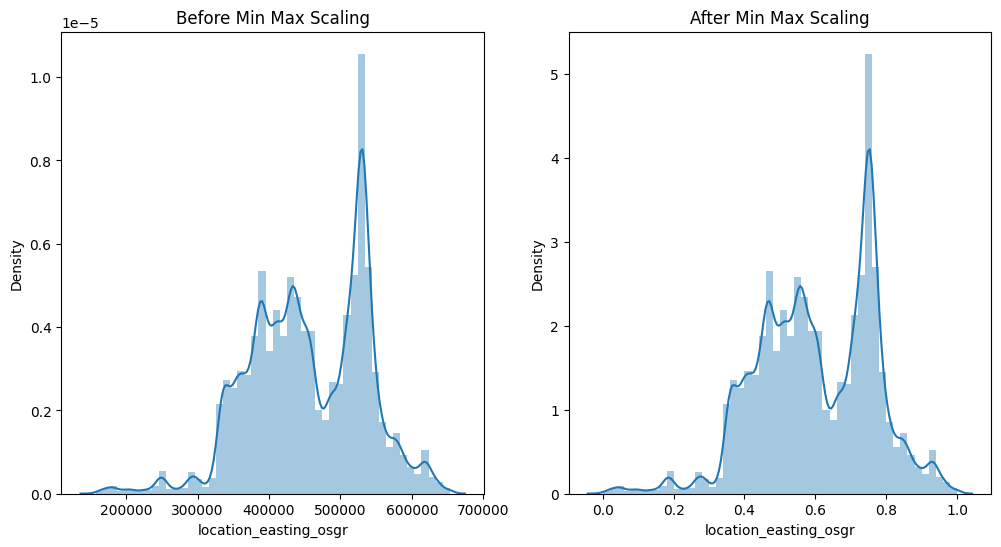

In [162]:
#apply min max scaling on the location_easting_osgr column
df_accident_scaling = min_max_scaling(df_accident_encoding_20 , 'location_easting_osgr')

#plot location_easting_osgr column before and after min max scaling
plot_min_max_scaling(df_accident_encoding_19 , df_accident_scaling , 'location_easting_osgr')

C:\Users\mosaa\AppData\Local\Temp\ipykernel_11920\1112938684.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])
C:\Users\mosaa\AppData\Local\Temp\ipykernel_11920\1112938684.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[column])


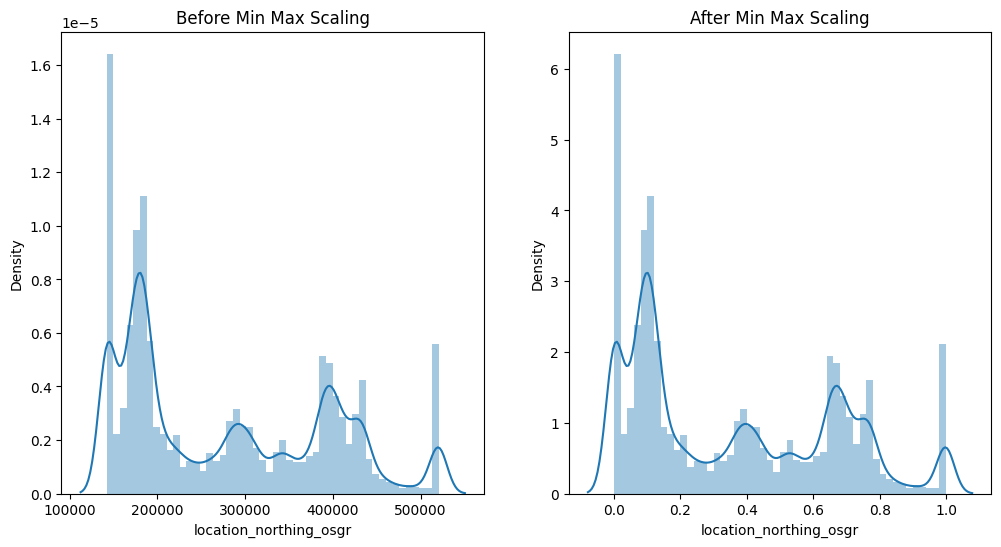

In [163]:
#apply min max scaling on the location_northing_osgr column
df_accident_scaling_1 = min_max_scaling(df_accident_scaling , 'location_northing_osgr')

#plot location_northing_osgr column before and after min max scaling
plot_min_max_scaling(df_accident_scaling , df_accident_scaling_1 , 'location_northing_osgr')

C:\Users\mosaa\AppData\Local\Temp\ipykernel_11920\1112938684.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])
C:\Users\mosaa\AppData\Local\Temp\ipykernel_11920\1112938684.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[column])


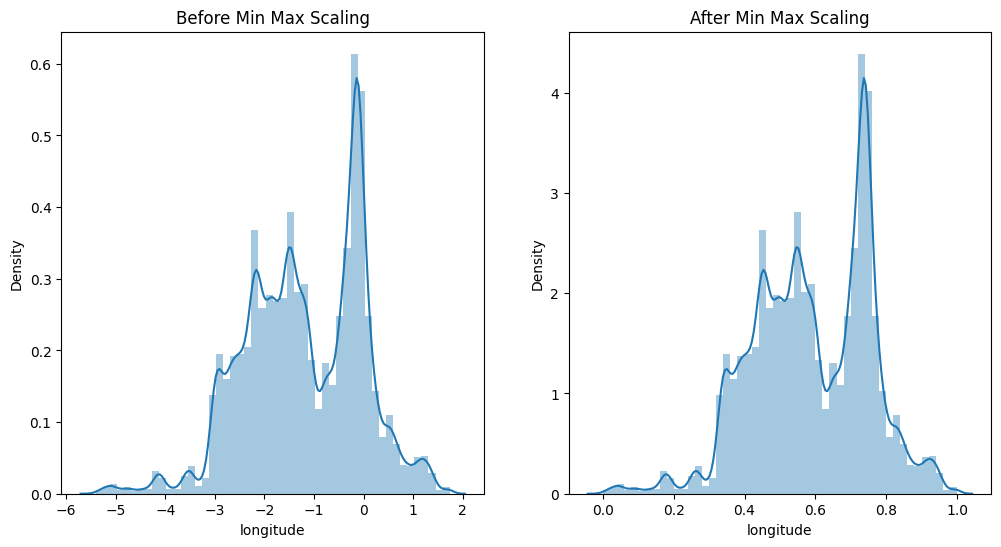

In [164]:
#apply min max scaling on the longitude column
df_accident_scaling_2 = min_max_scaling(df_accident_scaling_1 , 'longitude')

#plot longitude column before and after min max scaling
plot_min_max_scaling(df_accident_scaling_1 , df_accident_scaling_2 , 'longitude')

C:\Users\mosaa\AppData\Local\Temp\ipykernel_11920\1112938684.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])
C:\Users\mosaa\AppData\Local\Temp\ipykernel_11920\1112938684.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[column])


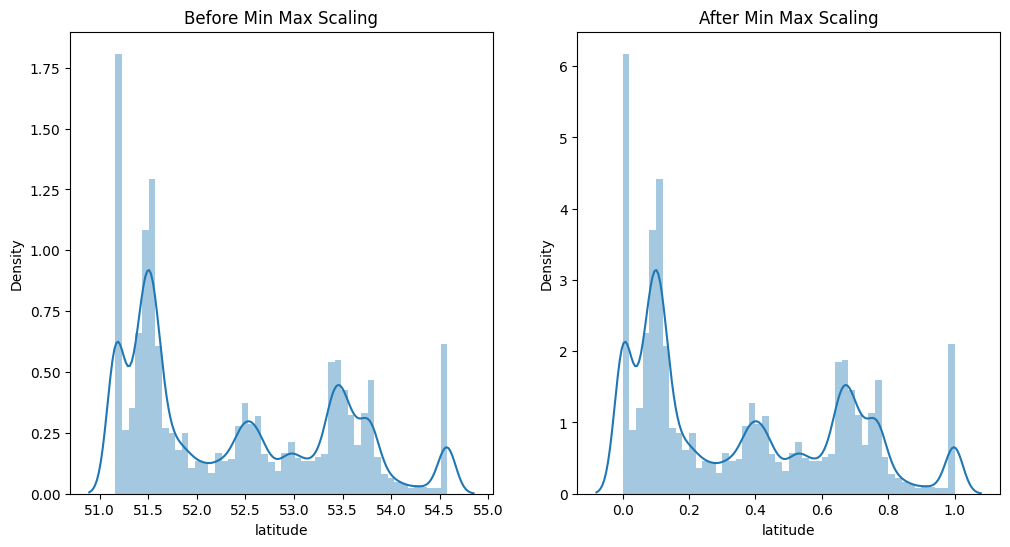

In [165]:
#apply min max scaling on the latitude column
df_accident_scaling_3 = min_max_scaling(df_accident_scaling_2 , 'latitude')

#plot latitude column before and after min max scaling
plot_min_max_scaling(df_accident_scaling_2 , df_accident_scaling_3 , 'latitude')

In [166]:
df_accident_scaling_3.head()

,location_easting_osgr,location_northing_osgr,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_number,speed_limit,second_road_number,Missing_Indicator,week_number,year,month,day,hour,minute,weekend,morning,police_force_Greater Manchester,police_force_Metropolitan Police,police_force_Rare,first_road_class_A,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway,first_road_class_Unclassified,road_type_Dual carriageway,road_type_One way street/Slip road,road_type_Roundabout,road_type_Single carriageway,junction_detail_Crossroads,junction_detail_Data missing or out of range,junction_detail_Mini-roundabout,junction_detail_More than 4 arms (not roundabout),junction_detail_Not at junction or within 20 metres,junction_detail_Other junction,junction_detail_Private drive or entrance,junction_detail_Roundabout,junction_detail_Slip road,junction_detail_T or staggered junction,junction_control_Authorised person,junction_control_Auto traffic signal,junction_control_Data missing or out of range,junction_control_Give way or uncontrolled,junction_control_Stop sign,second_road_class_A,second_road_class_A(M),second_road_class_B,second_road_class_C,second_road_class_Did not happen on intersections,second_road_class_Motorway,second_road_class_Unclassified,pedestrian_crossing_human_control_Control by other authorised person,pedestrian_crossing_human_control_Control by school crossing patrol,pedestrian_crossing_human_control_Data missing or out of range,pedestrian_crossing_human_control_None within 50 metres,pedestrian_crossing_physical_facilities_Central refuge,pedestrian_crossing_physical_facilities_Data missing or out of range,pedestrian_crossing_physical_facilities_Footbridge or subway,pedestrian_crossing_physical_facilities_No physical crossing facilities within 50 metres,pedestrian_crossing_physical_facilities_Pedestrian phase at traffic signal junction,"pedestrian_crossing_physical_facilities_Pelican, puffin, toucan or similar non-junction pedestrian light crossing",pedestrian_crossing_physical_facilities_Zebra,light_conditions_Darkness - lighting unknown,light_conditions_Darkness - lights lit,light_conditions_Darkness - lights unlit,light_conditions_Darkness - no lighting,light_conditions_Data missing or out of range,light_conditions_Daylight,weather_conditions_Data missing or out of range,weather_conditions_Fine + high winds,weather_conditions_Fine no high winds,weather_conditions_Fog or mist,weather_conditions_Missing,weather_conditions_Other,weather_conditions_Raining + high winds,weather_conditions_Raining no high winds,weather_conditions_Snowing + high winds,weather_conditions_Snowing no high winds,road_surface_conditions_Data missing or out of range,road_surface_conditions_Dry,road_surface_conditions_Flood over 3cm. deep,road_surface_conditions_Frost or ice,road_surface_conditions_Mud,road_surface_conditions_Oil or diesel,road_surface_conditions_Snow,road_surface_conditions_Wet or damp,urban_or_rural_area_Rural,urban_or_rural_area_Urban,did_police_officer_attend_scene_of_accident_Data missing or out of range,did_police_officer_attend_scene_of_accident_No,did_police_officer_attend_scene_of_accident_Yes,trunk_road_flag_Data missing or out of range,trunk_road_flag_Non-trunk,trunk_road_flag_Trunk (Roads managed by Highways England),lsoa_of_accident_location_E_W,lsoa_of_accident_location_number
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1999010SU0945,0.730689,0.161229,0.718661,0.161789,0,1.0,1.0,0.134905,136,126,55,25.0,60.0,25.000000,0,51,1999,12,25,9,30,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,1023583
1999010SU0946,0.735224,0.155335,0.723107,0.155781,0,2.0,1.0,0.167314,136,126,55,25.0,60.0

apply the standardization to the **local_authority_district** , **local_authority_ons_district** and **local_authority_highway** 

C:\Users\mosaa\AppData\Local\Temp\ipykernel_11920\1112938684.py:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])
C:\Users\mosaa\AppData\Local\Temp\ipykernel_11920\1112938684.py:31: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[column])


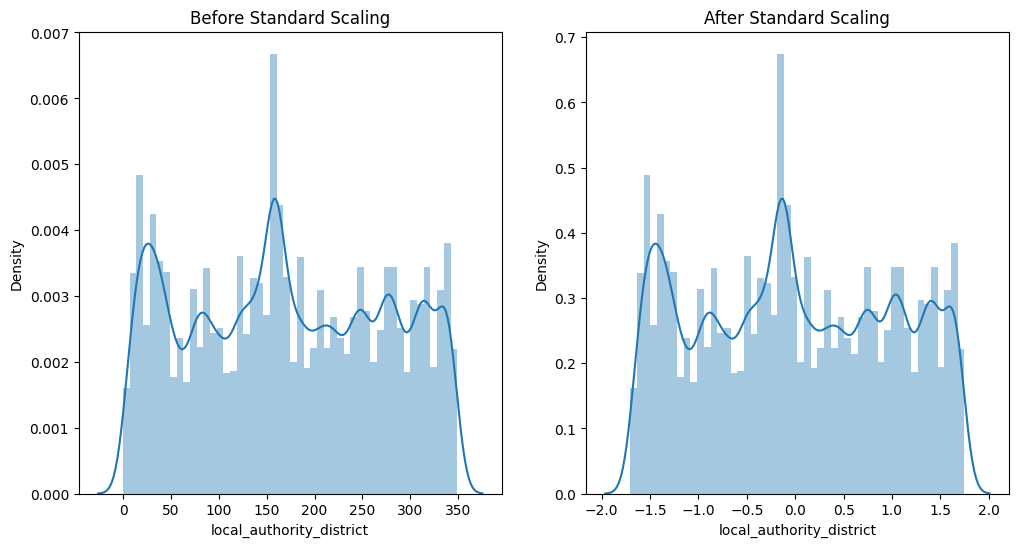

In [167]:
#apply standard scaling on the local_authority_district column
df_accident_scaling_4 = standard_scaling(df_accident_scaling_3 , 'local_authority_district')

#plot local_authority_district column before and after standard scaling
plot_standard_scaling(df_accident_scaling_3 , df_accident_scaling_4 , 'local_authority_district')



C:\Users\mosaa\AppData\Local\Temp\ipykernel_11920\1112938684.py:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])
C:\Users\mosaa\AppData\Local\Temp\ipykernel_11920\1112938684.py:31: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[column])


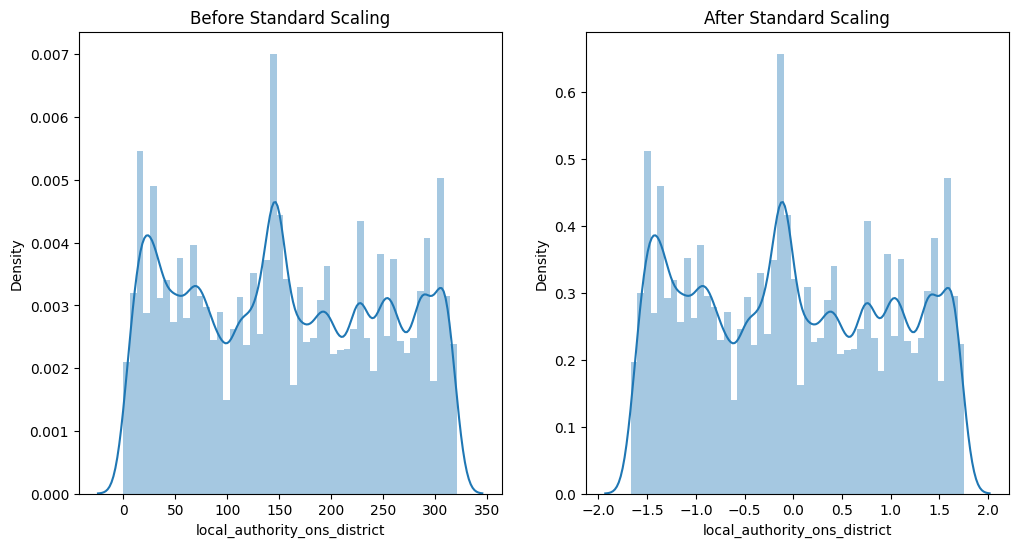

In [168]:
#apply standard scaling on the local_authority_ons_district column
df_accident_scaling_5 = standard_scaling(df_accident_scaling_4 , 'local_authority_ons_district')

#plot local_authority_ons_district column before and after standard scaling
plot_standard_scaling(df_accident_scaling_4 , df_accident_scaling_5 , 'local_authority_ons_district')

C:\Users\mosaa\AppData\Local\Temp\ipykernel_11920\1112938684.py:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])
C:\Users\mosaa\AppData\Local\Temp\ipykernel_11920\1112938684.py:31: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[column])


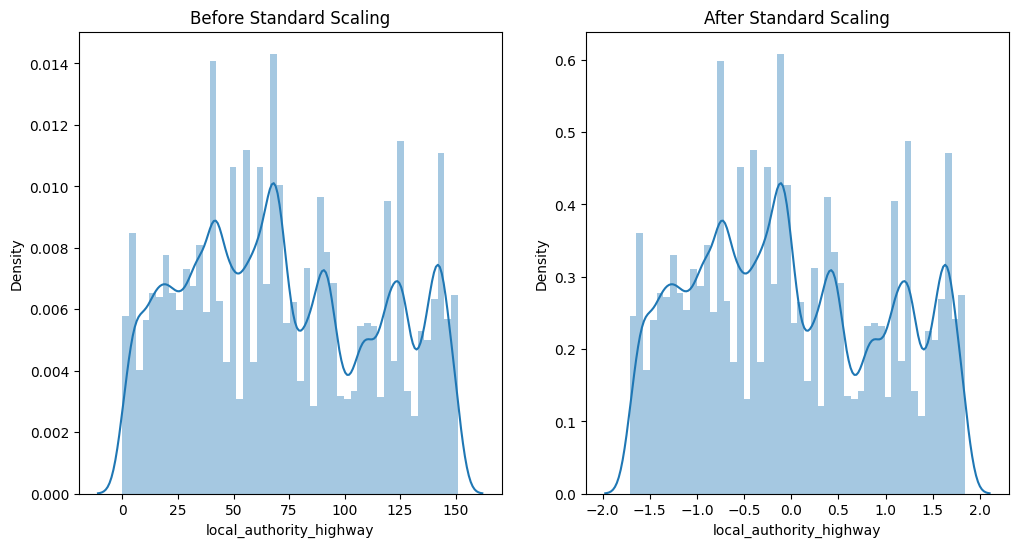

In [169]:
#apply standard scaling on the local_authority_highway column
df_accident_scaling_6 = standard_scaling(df_accident_scaling_5 , 'local_authority_highway')

#plot local_authority_highway column before and after standard scaling
plot_standard_scaling(df_accident_scaling_5 , df_accident_scaling_6 , 'local_authority_highway')

In [170]:
df_accident_scaling_6.head()

,location_easting_osgr,location_northing_osgr,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_number,speed_limit,second_road_number,Missing_Indicator,week_number,year,month,day,hour,minute,weekend,morning,police_force_Greater Manchester,police_force_Metropolitan Police,police_force_Rare,first_road_class_A,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway,first_road_class_Unclassified,road_type_Dual carriageway,road_type_One way street/Slip road,road_type_Roundabout,road_type_Single carriageway,junction_detail_Crossroads,junction_detail_Data missing or out of range,junction_detail_Mini-roundabout,junction_detail_More than 4 arms (not roundabout),junction_detail_Not at junction or within 20 metres,junction_detail_Other junction,junction_detail_Private drive or entrance,junction_detail_Roundabout,junction_detail_Slip road,junction_detail_T or staggered junction,junction_control_Authorised person,junction_control_Auto traffic signal,junction_control_Data missing or out of range,junction_control_Give way or uncontrolled,junction_control_Stop sign,second_road_class_A,second_road_class_A(M),second_road_class_B,second_road_class_C,second_road_class_Did not happen on intersections,second_road_class_Motorway,second_road_class_Unclassified,pedestrian_crossing_human_control_Control by other authorised person,pedestrian_crossing_human_control_Control by school crossing patrol,pedestrian_crossing_human_control_Data missing or out of range,pedestrian_crossing_human_control_None within 50 metres,pedestrian_crossing_physical_facilities_Central refuge,pedestrian_crossing_physical_facilities_Data missing or out of range,pedestrian_crossing_physical_facilities_Footbridge or subway,pedestrian_crossing_physical_facilities_No physical crossing facilities within 50 metres,pedestrian_crossing_physical_facilities_Pedestrian phase at traffic signal junction,"pedestrian_crossing_physical_facilities_Pelican, puffin, toucan or similar non-junction pedestrian light crossing",pedestrian_crossing_physical_facilities_Zebra,light_conditions_Darkness - lighting unknown,light_conditions_Darkness - lights lit,light_conditions_Darkness - lights unlit,light_conditions_Darkness - no lighting,light_conditions_Data missing or out of range,light_conditions_Daylight,weather_conditions_Data missing or out of range,weather_conditions_Fine + high winds,weather_conditions_Fine no high winds,weather_conditions_Fog or mist,weather_conditions_Missing,weather_conditions_Other,weather_conditions_Raining + high winds,weather_conditions_Raining no high winds,weather_conditions_Snowing + high winds,weather_conditions_Snowing no high winds,road_surface_conditions_Data missing or out of range,road_surface_conditions_Dry,road_surface_conditions_Flood over 3cm. deep,road_surface_conditions_Frost or ice,road_surface_conditions_Mud,road_surface_conditions_Oil or diesel,road_surface_conditions_Snow,road_surface_conditions_Wet or damp,urban_or_rural_area_Rural,urban_or_rural_area_Urban,did_police_officer_attend_scene_of_accident_Data missing or out of range,did_police_officer_attend_scene_of_accident_No,did_police_officer_attend_scene_of_accident_Yes,trunk_road_flag_Data missing or out of range,trunk_road_flag_Non-trunk,trunk_road_flag_Trunk (Roads managed by Highways England),lsoa_of_accident_location_E_W,lsoa_of_accident_location_number
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1999010SU0945,0.730689,0.161229,0.718661,0.161789,0,1.0,1.0,0.134905,-0.358038,-0.325911,-0.417503,25.0,60.0,25.000000,0,51,1999,12,25,9,30,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,1023583
1999010SU0946,0.735224,0.155335,0.723107,0.155781,0,2.0,1.0,0.167314,-

apply standardization to the **first_road_number** and **second_road_number** columns 

C:\Users\mosaa\AppData\Local\Temp\ipykernel_11920\1112938684.py:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])
C:\Users\mosaa\AppData\Local\Temp\ipykernel_11920\1112938684.py:31: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[column])


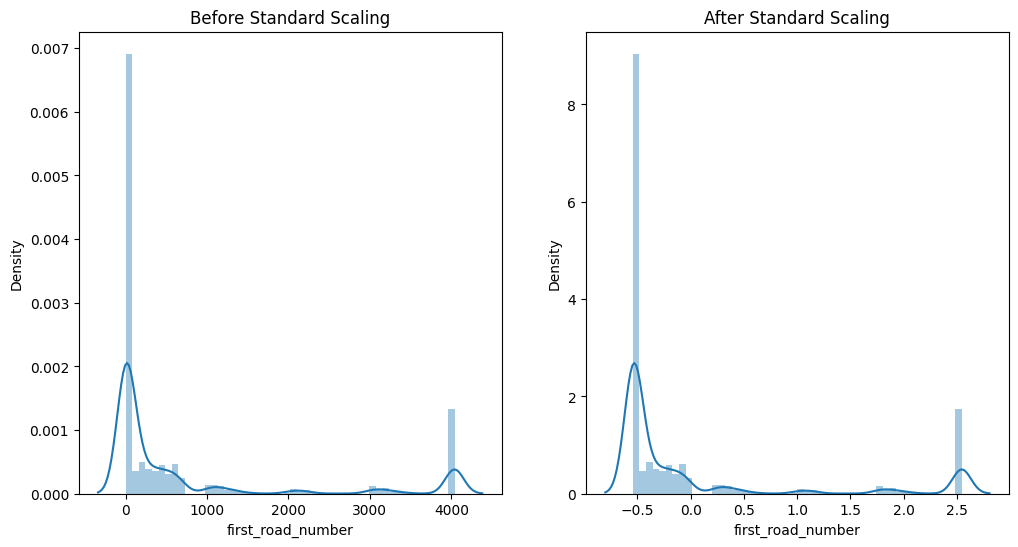

In [171]:
#apply standard scaling on the first_road_number column
df_accident_scaling_7 = standard_scaling(df_accident_scaling_6 , 'first_road_number')

#plot first_road_number column before and after standard scaling
plot_standard_scaling(df_accident_scaling_6 , df_accident_scaling_7 , 'first_road_number')

C:\Users\mosaa\AppData\Local\Temp\ipykernel_11920\1112938684.py:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])
C:\Users\mosaa\AppData\Local\Temp\ipykernel_11920\1112938684.py:31: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[column])


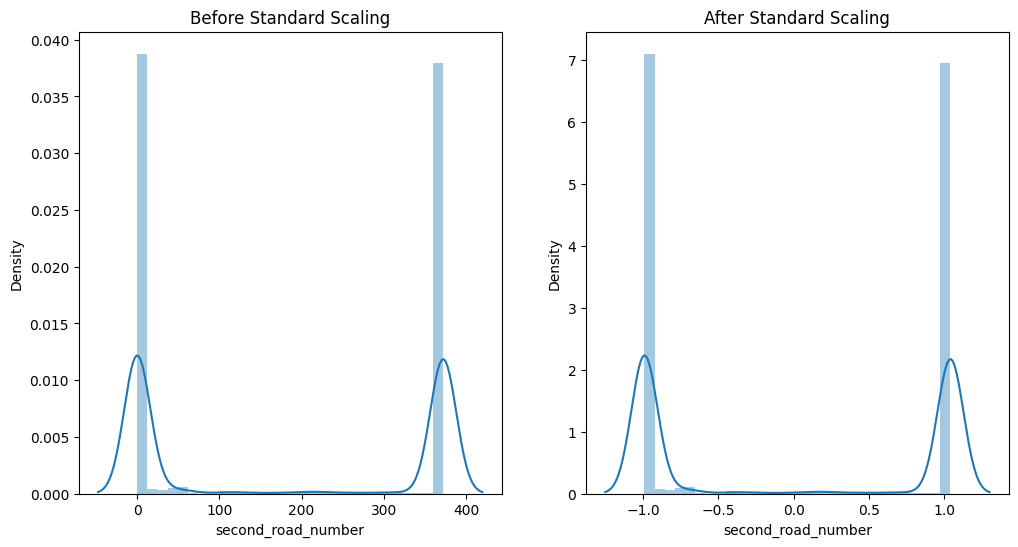

In [172]:
#apply standard scaling on the second_road_number column
df_accident_scaling_8 = standard_scaling(df_accident_scaling_7 , 'second_road_number')

#plot second_road_number column before and after standard scaling
plot_standard_scaling(df_accident_scaling_7 , df_accident_scaling_8 , 'second_road_number')

In [173]:
df_accident_scaling_8.describe()

,location_easting_osgr,location_northing_osgr,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_number,speed_limit,second_road_number,Missing_Indicator,week_number,year,month,day,hour,minute,weekend,morning,police_force_Greater Manchester,police_force_Metropolitan Police,police_force_Rare,first_road_class_A,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway,first_road_class_Unclassified,road_type_Dual carriageway,road_type_One way street/Slip road,road_type_Roundabout,road_type_Single carriageway,junction_detail_Crossroads,junction_detail_Data missing or out of range,junction_detail_Mini-roundabout,junction_detail_More than 4 arms (not roundabout),junction_detail_Not at junction or within 20 metres,junction_detail_Other junction,junction_detail_Private drive or entrance,junction_detail_Roundabout,junction_detail_Slip road,junction_detail_T or staggered junction,junction_control_Authorised person,junction_control_Auto traffic signal,junction_control_Data missing or out of range,junction_control_Give way or uncontrolled,junction_control_Stop sign,second_road_class_A,second_road_class_A(M),second_road_class_B,second_road_class_C,second_road_class_Did not happen on intersections,second_road_class_Motorway,second_road_class_Unclassified,pedestrian_crossing_human_control_Control by other authorised person,pedestrian_crossing_human_control_Control by school crossing patrol,pedestrian_crossing_human_control_Data missing or out of range,pedestrian_crossing_human_control_None within 50 metres,pedestrian_crossing_physical_facilities_Central refuge,pedestrian_crossing_physical_facilities_Data missing or out of range,pedestrian_crossing_physical_facilities_Footbridge or subway,pedestrian_crossing_physical_facilities_No physical crossing facilities within 50 metres,pedestrian_crossing_physical_facilities_Pedestrian phase at traffic signal junction,"pedestrian_crossing_physical_facilities_Pelican, puffin, toucan or similar non-junction pedestrian light crossing",pedestrian_crossing_physical_facilities_Zebra,light_conditions_Darkness - lighting unknown,light_conditions_Darkness - lights lit,light_conditions_Darkness - lights unlit,light_conditions_Darkness - no lighting,light_conditions_Data missing or out of range,light_conditions_Daylight,weather_conditions_Data missing or out of range,weather_conditions_Fine + high winds,weather_conditions_Fine no high winds,weather_conditions_Fog or mist,weather_conditions_Missing,weather_conditions_Other,weather_conditions_Raining + high winds,weather_conditions_Raining no high winds,weather_conditions_Snowing + high winds,weather_conditions_Snowing no high winds,road_surface_conditions_Data missing or out of range,road_surface_conditions_Dry,road_surface_conditions_Flood over 3cm. deep,road_surface_conditions_Frost or ice,road_surface_conditions_Mud,road_surface_conditions_Oil or diesel,road_surface_conditions_Snow,road_surface_conditions_Wet or damp,urban_or_rural_area_Rural,urban_or_rural_area_Urban,did_police_officer_attend_scene_of_accident_Data missing or out of range,did_police_officer_attend_scene_of_accident_No,did_police_officer_attend_scene_of_accident_Yes,trunk_road_flag_Data missing or out of range,trunk_road_flag_Non-trunk,trunk_road_flag_Trunk (Roads managed by Highways England),lsoa_of_accident_location_E_W,lsoa_of_accident_location_number
count,207102.000000,207102.000000,207102.000000,207102.000000,207102.000000,207102.000000,207102.000000,207102.000000,2.071020e+05,2.071020e+05,2.071020e+05,2.071020e+05,207102.000000,2.071020e+05,207102.000000,207102.0,207102.0,207102.00000,207102.000000,207102.000000,207102.000000,207102.000000,207102.000000,207102.000000,207102.000000,207102.000000,207102.000000,207102.000000,207102.000000,207102.000000,207102.000000,207102.000000,207102.000000,207102.000000,207102.000000,207102.000000,2071

apply standardization to the **speed_limit** column

C:\Users\mosaa\AppData\Local\Temp\ipykernel_11920\1112938684.py:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])
C:\Users\mosaa\AppData\Local\Temp\ipykernel_11920\1112938684.py:31: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[column])


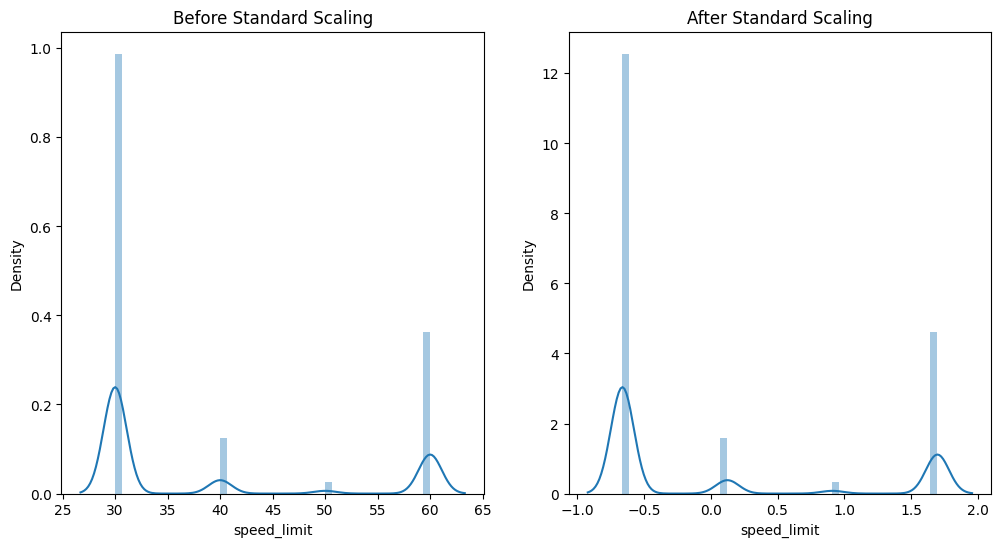

In [174]:
#apply standard scaling on the speed_limit column
df_accident_scaling_9 = standard_scaling(df_accident_scaling_8 , 'speed_limit')

#plot speed_limit column before and after standard scaling 
plot_standard_scaling(df_accident_scaling_8 , df_accident_scaling_9 , 'speed_limit')

In [175]:
df_accident_scaling_9.describe()

,location_easting_osgr,location_northing_osgr,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_number,speed_limit,second_road_number,Missing_Indicator,week_number,year,month,day,hour,minute,weekend,morning,police_force_Greater Manchester,police_force_Metropolitan Police,police_force_Rare,first_road_class_A,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway,first_road_class_Unclassified,road_type_Dual carriageway,road_type_One way street/Slip road,road_type_Roundabout,road_type_Single carriageway,junction_detail_Crossroads,junction_detail_Data missing or out of range,junction_detail_Mini-roundabout,junction_detail_More than 4 arms (not roundabout),junction_detail_Not at junction or within 20 metres,junction_detail_Other junction,junction_detail_Private drive or entrance,junction_detail_Roundabout,junction_detail_Slip road,junction_detail_T or staggered junction,junction_control_Authorised person,junction_control_Auto traffic signal,junction_control_Data missing or out of range,junction_control_Give way or uncontrolled,junction_control_Stop sign,second_road_class_A,second_road_class_A(M),second_road_class_B,second_road_class_C,second_road_class_Did not happen on intersections,second_road_class_Motorway,second_road_class_Unclassified,pedestrian_crossing_human_control_Control by other authorised person,pedestrian_crossing_human_control_Control by school crossing patrol,pedestrian_crossing_human_control_Data missing or out of range,pedestrian_crossing_human_control_None within 50 metres,pedestrian_crossing_physical_facilities_Central refuge,pedestrian_crossing_physical_facilities_Data missing or out of range,pedestrian_crossing_physical_facilities_Footbridge or subway,pedestrian_crossing_physical_facilities_No physical crossing facilities within 50 metres,pedestrian_crossing_physical_facilities_Pedestrian phase at traffic signal junction,"pedestrian_crossing_physical_facilities_Pelican, puffin, toucan or similar non-junction pedestrian light crossing",pedestrian_crossing_physical_facilities_Zebra,light_conditions_Darkness - lighting unknown,light_conditions_Darkness - lights lit,light_conditions_Darkness - lights unlit,light_conditions_Darkness - no lighting,light_conditions_Data missing or out of range,light_conditions_Daylight,weather_conditions_Data missing or out of range,weather_conditions_Fine + high winds,weather_conditions_Fine no high winds,weather_conditions_Fog or mist,weather_conditions_Missing,weather_conditions_Other,weather_conditions_Raining + high winds,weather_conditions_Raining no high winds,weather_conditions_Snowing + high winds,weather_conditions_Snowing no high winds,road_surface_conditions_Data missing or out of range,road_surface_conditions_Dry,road_surface_conditions_Flood over 3cm. deep,road_surface_conditions_Frost or ice,road_surface_conditions_Mud,road_surface_conditions_Oil or diesel,road_surface_conditions_Snow,road_surface_conditions_Wet or damp,urban_or_rural_area_Rural,urban_or_rural_area_Urban,did_police_officer_attend_scene_of_accident_Data missing or out of range,did_police_officer_attend_scene_of_accident_No,did_police_officer_attend_scene_of_accident_Yes,trunk_road_flag_Data missing or out of range,trunk_road_flag_Non-trunk,trunk_road_flag_Trunk (Roads managed by Highways England),lsoa_of_accident_location_E_W,lsoa_of_accident_location_number
count,207102.000000,207102.000000,207102.000000,207102.000000,207102.000000,207102.000000,207102.000000,207102.000000,2.071020e+05,2.071020e+05,2.071020e+05,2.071020e+05,2.071020e+05,2.071020e+05,207102.000000,207102.0,207102.0,207102.00000,207102.000000,207102.000000,207102.000000,207102.000000,207102.000000,207102.000000,207102.000000,207102.000000,207102.000000,207102.000000,207102.000000,207102.000000,207102.000000,207102.000000,207102.000000,207102.000000,207102.000000,207102.000000,20710

C:\Users\mosaa\AppData\Local\Temp\ipykernel_11920\1112938684.py:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])
C:\Users\mosaa\AppData\Local\Temp\ipykernel_11920\1112938684.py:31: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[column])


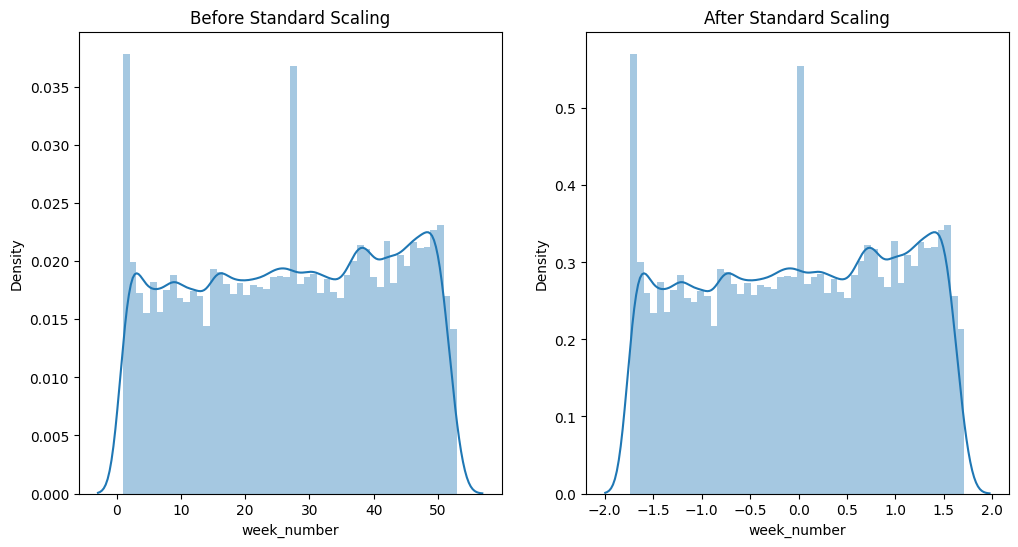

In [176]:
#apply standard scaling on the week_number , month , day , hour and minute columns
df_accident_scaling_10 = standard_scaling(df_accident_scaling_9 , 'week_number')
#plot week_number column before and after standard scaling
plot_standard_scaling(df_accident_scaling_9 , df_accident_scaling_10 , 'week_number')


C:\Users\mosaa\AppData\Local\Temp\ipykernel_11920\1112938684.py:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])
C:\Users\mosaa\AppData\Local\Temp\ipykernel_11920\1112938684.py:31: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[column])


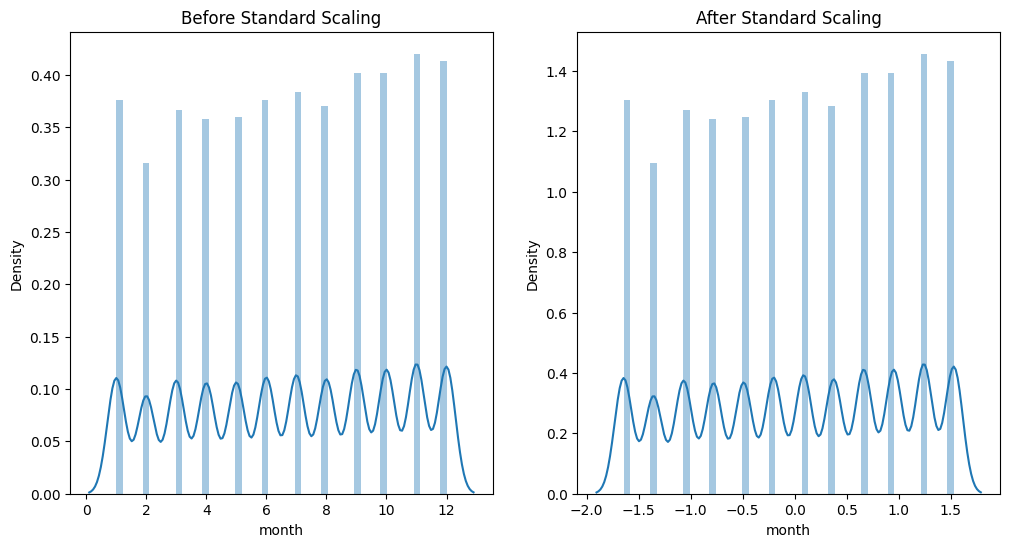

In [177]:
df_accident_scaling_11 = standard_scaling(df_accident_scaling_10 , 'month')

#plot month column before and after standard scaling
plot_standard_scaling(df_accident_scaling_10 , df_accident_scaling_11 , 'month')

C:\Users\mosaa\AppData\Local\Temp\ipykernel_11920\1112938684.py:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])
C:\Users\mosaa\AppData\Local\Temp\ipykernel_11920\1112938684.py:31: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[column])


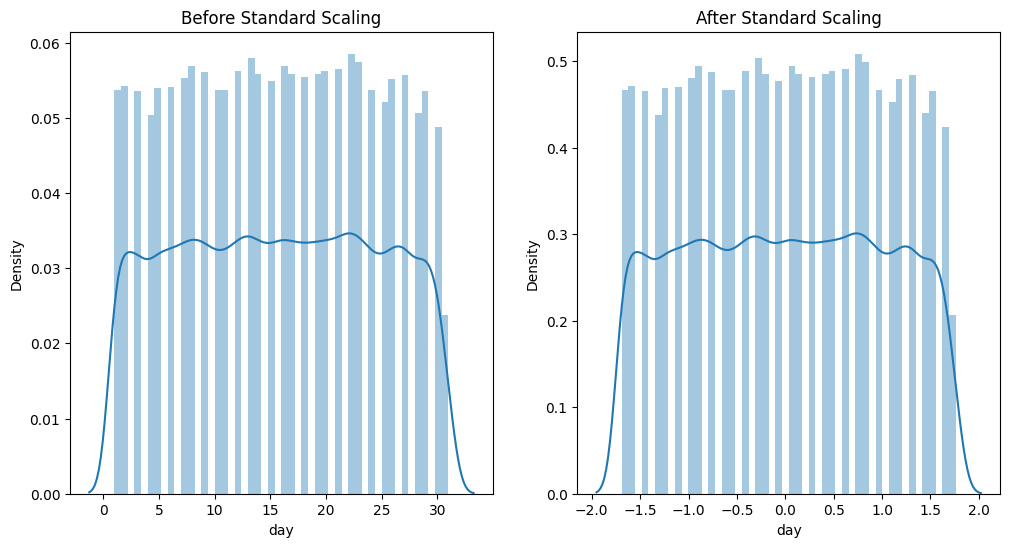

In [178]:
df_accident_scaling_12 = standard_scaling(df_accident_scaling_11 , 'day')

#plot day column before and after standard scaling
plot_standard_scaling(df_accident_scaling_11 , df_accident_scaling_12 , 'day')

C:\Users\mosaa\AppData\Local\Temp\ipykernel_11920\1112938684.py:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])
C:\Users\mosaa\AppData\Local\Temp\ipykernel_11920\1112938684.py:31: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[column])


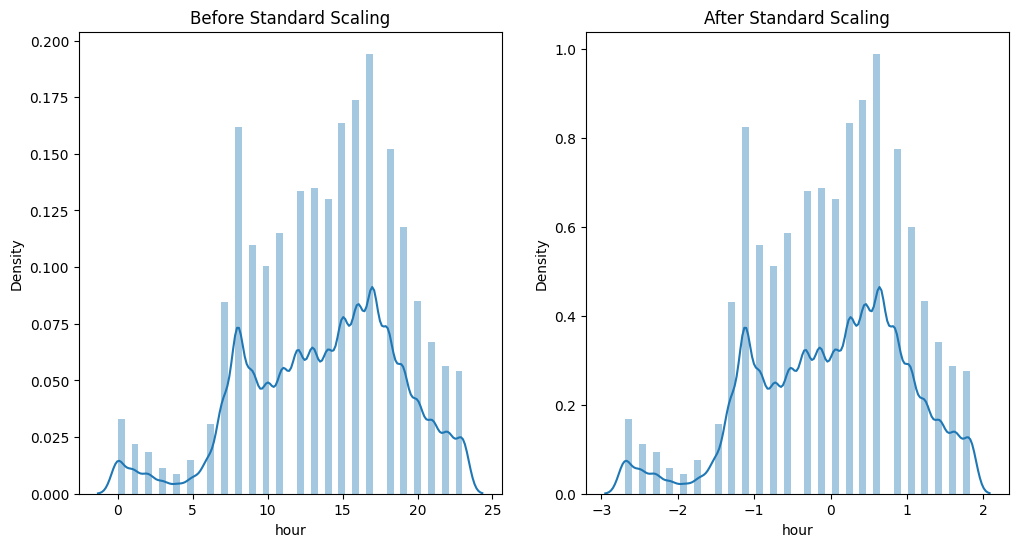

In [179]:
df_accident_scaling_13 = standard_scaling(df_accident_scaling_12 , 'hour')

#plot hour column before and after standard scaling
plot_standard_scaling(df_accident_scaling_12 , df_accident_scaling_13 , 'hour')

C:\Users\mosaa\AppData\Local\Temp\ipykernel_11920\1112938684.py:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])
C:\Users\mosaa\AppData\Local\Temp\ipykernel_11920\1112938684.py:31: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[column])


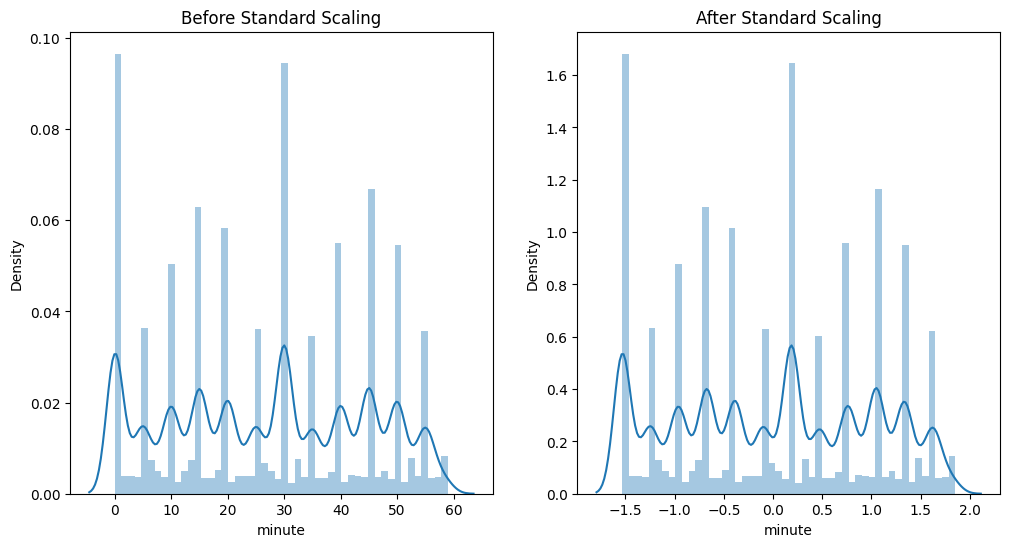

In [180]:
df_accident_scaling_14 = standard_scaling(df_accident_scaling_13 , 'minute')

#plot minute column before and after standard scaling
plot_standard_scaling(df_accident_scaling_13 , df_accident_scaling_14 , 'minute')

for the **lsoa_of_accident_location_number** we will apply the min-max normalization

C:\Users\mosaa\AppData\Local\Temp\ipykernel_11920\1112938684.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])
C:\Users\mosaa\AppData\Local\Temp\ipykernel_11920\1112938684.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[column])


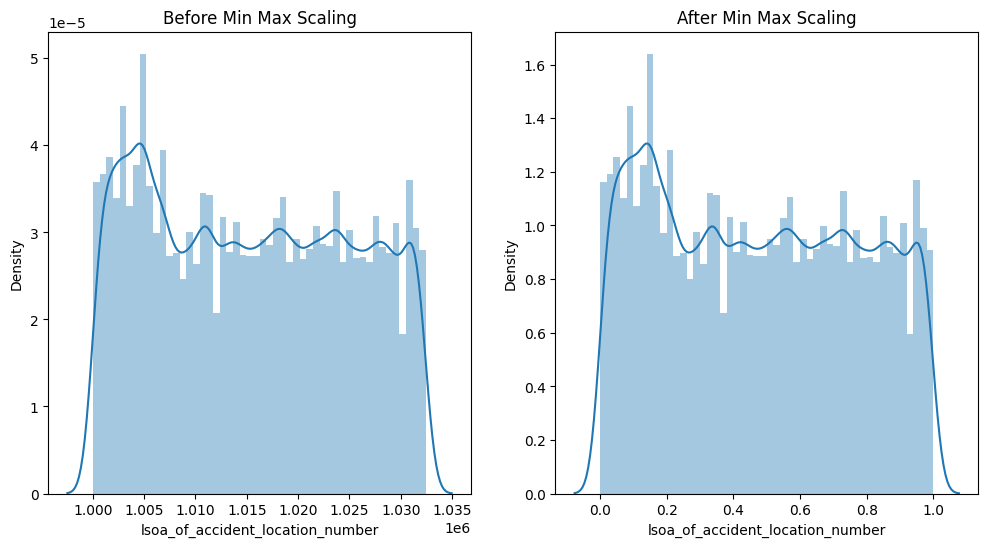

In [181]:
#apply min max scaling on the lsoa_of_accident_location_number 
df_accident_scaling_15 = min_max_scaling(df_accident_scaling_14 , 'lsoa_of_accident_location_number')

#plot lsoa_of_accident_location_number column before and after min max scaling
plot_min_max_scaling(df_accident_scaling_14 , df_accident_scaling_15 , 'lsoa_of_accident_location_number')

In [182]:
df_accident_scaling_15.describe()

,location_easting_osgr,location_northing_osgr,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_number,speed_limit,second_road_number,Missing_Indicator,week_number,year,month,day,hour,minute,weekend,morning,police_force_Greater Manchester,police_force_Metropolitan Police,police_force_Rare,first_road_class_A,first_road_class_A(M),first_road_class_B,first_road_class_C,first_road_class_Motorway,first_road_class_Unclassified,road_type_Dual carriageway,road_type_One way street/Slip road,road_type_Roundabout,road_type_Single carriageway,junction_detail_Crossroads,junction_detail_Data missing or out of range,junction_detail_Mini-roundabout,junction_detail_More than 4 arms (not roundabout),junction_detail_Not at junction or within 20 metres,junction_detail_Other junction,junction_detail_Private drive or entrance,junction_detail_Roundabout,junction_detail_Slip road,junction_detail_T or staggered junction,junction_control_Authorised person,junction_control_Auto traffic signal,junction_control_Data missing or out of range,junction_control_Give way or uncontrolled,junction_control_Stop sign,second_road_class_A,second_road_class_A(M),second_road_class_B,second_road_class_C,second_road_class_Did not happen on intersections,second_road_class_Motorway,second_road_class_Unclassified,pedestrian_crossing_human_control_Control by other authorised person,pedestrian_crossing_human_control_Control by school crossing patrol,pedestrian_crossing_human_control_Data missing or out of range,pedestrian_crossing_human_control_None within 50 metres,pedestrian_crossing_physical_facilities_Central refuge,pedestrian_crossing_physical_facilities_Data missing or out of range,pedestrian_crossing_physical_facilities_Footbridge or subway,pedestrian_crossing_physical_facilities_No physical crossing facilities within 50 metres,pedestrian_crossing_physical_facilities_Pedestrian phase at traffic signal junction,"pedestrian_crossing_physical_facilities_Pelican, puffin, toucan or similar non-junction pedestrian light crossing",pedestrian_crossing_physical_facilities_Zebra,light_conditions_Darkness - lighting unknown,light_conditions_Darkness - lights lit,light_conditions_Darkness - lights unlit,light_conditions_Darkness - no lighting,light_conditions_Data missing or out of range,light_conditions_Daylight,weather_conditions_Data missing or out of range,weather_conditions_Fine + high winds,weather_conditions_Fine no high winds,weather_conditions_Fog or mist,weather_conditions_Missing,weather_conditions_Other,weather_conditions_Raining + high winds,weather_conditions_Raining no high winds,weather_conditions_Snowing + high winds,weather_conditions_Snowing no high winds,road_surface_conditions_Data missing or out of range,road_surface_conditions_Dry,road_surface_conditions_Flood over 3cm. deep,road_surface_conditions_Frost or ice,road_surface_conditions_Mud,road_surface_conditions_Oil or diesel,road_surface_conditions_Snow,road_surface_conditions_Wet or damp,urban_or_rural_area_Rural,urban_or_rural_area_Urban,did_police_officer_attend_scene_of_accident_Data missing or out of range,did_police_officer_attend_scene_of_accident_No,did_police_officer_attend_scene_of_accident_Yes,trunk_road_flag_Data missing or out of range,trunk_road_flag_Non-trunk,trunk_road_flag_Trunk (Roads managed by Highways England),lsoa_of_accident_location_E_W,lsoa_of_accident_location_number
count,207102.000000,207102.000000,207102.000000,207102.000000,207102.000000,207102.000000,207102.000000,207102.000000,2.071020e+05,2.071020e+05,2.071020e+05,2.071020e+05,2.071020e+05,2.071020e+05,207102.000000,207102.0,207102.0,2.071020e+05,2.071020e+05,2.071020e+05,2.071020e+05,207102.000000,207102.000000,207102.000000,207102.000000,207102.000000,207102.000000,207102.000000,207102.000000,207102.000000,207102.000000,207102.000000,207102.000000,207102.000000,207102.000000,207102.000000,207102.0

In [183]:
#saving the final dataframe to a csv file
df_accident_scaling_15.to_csv('accident_cleaned.csv')